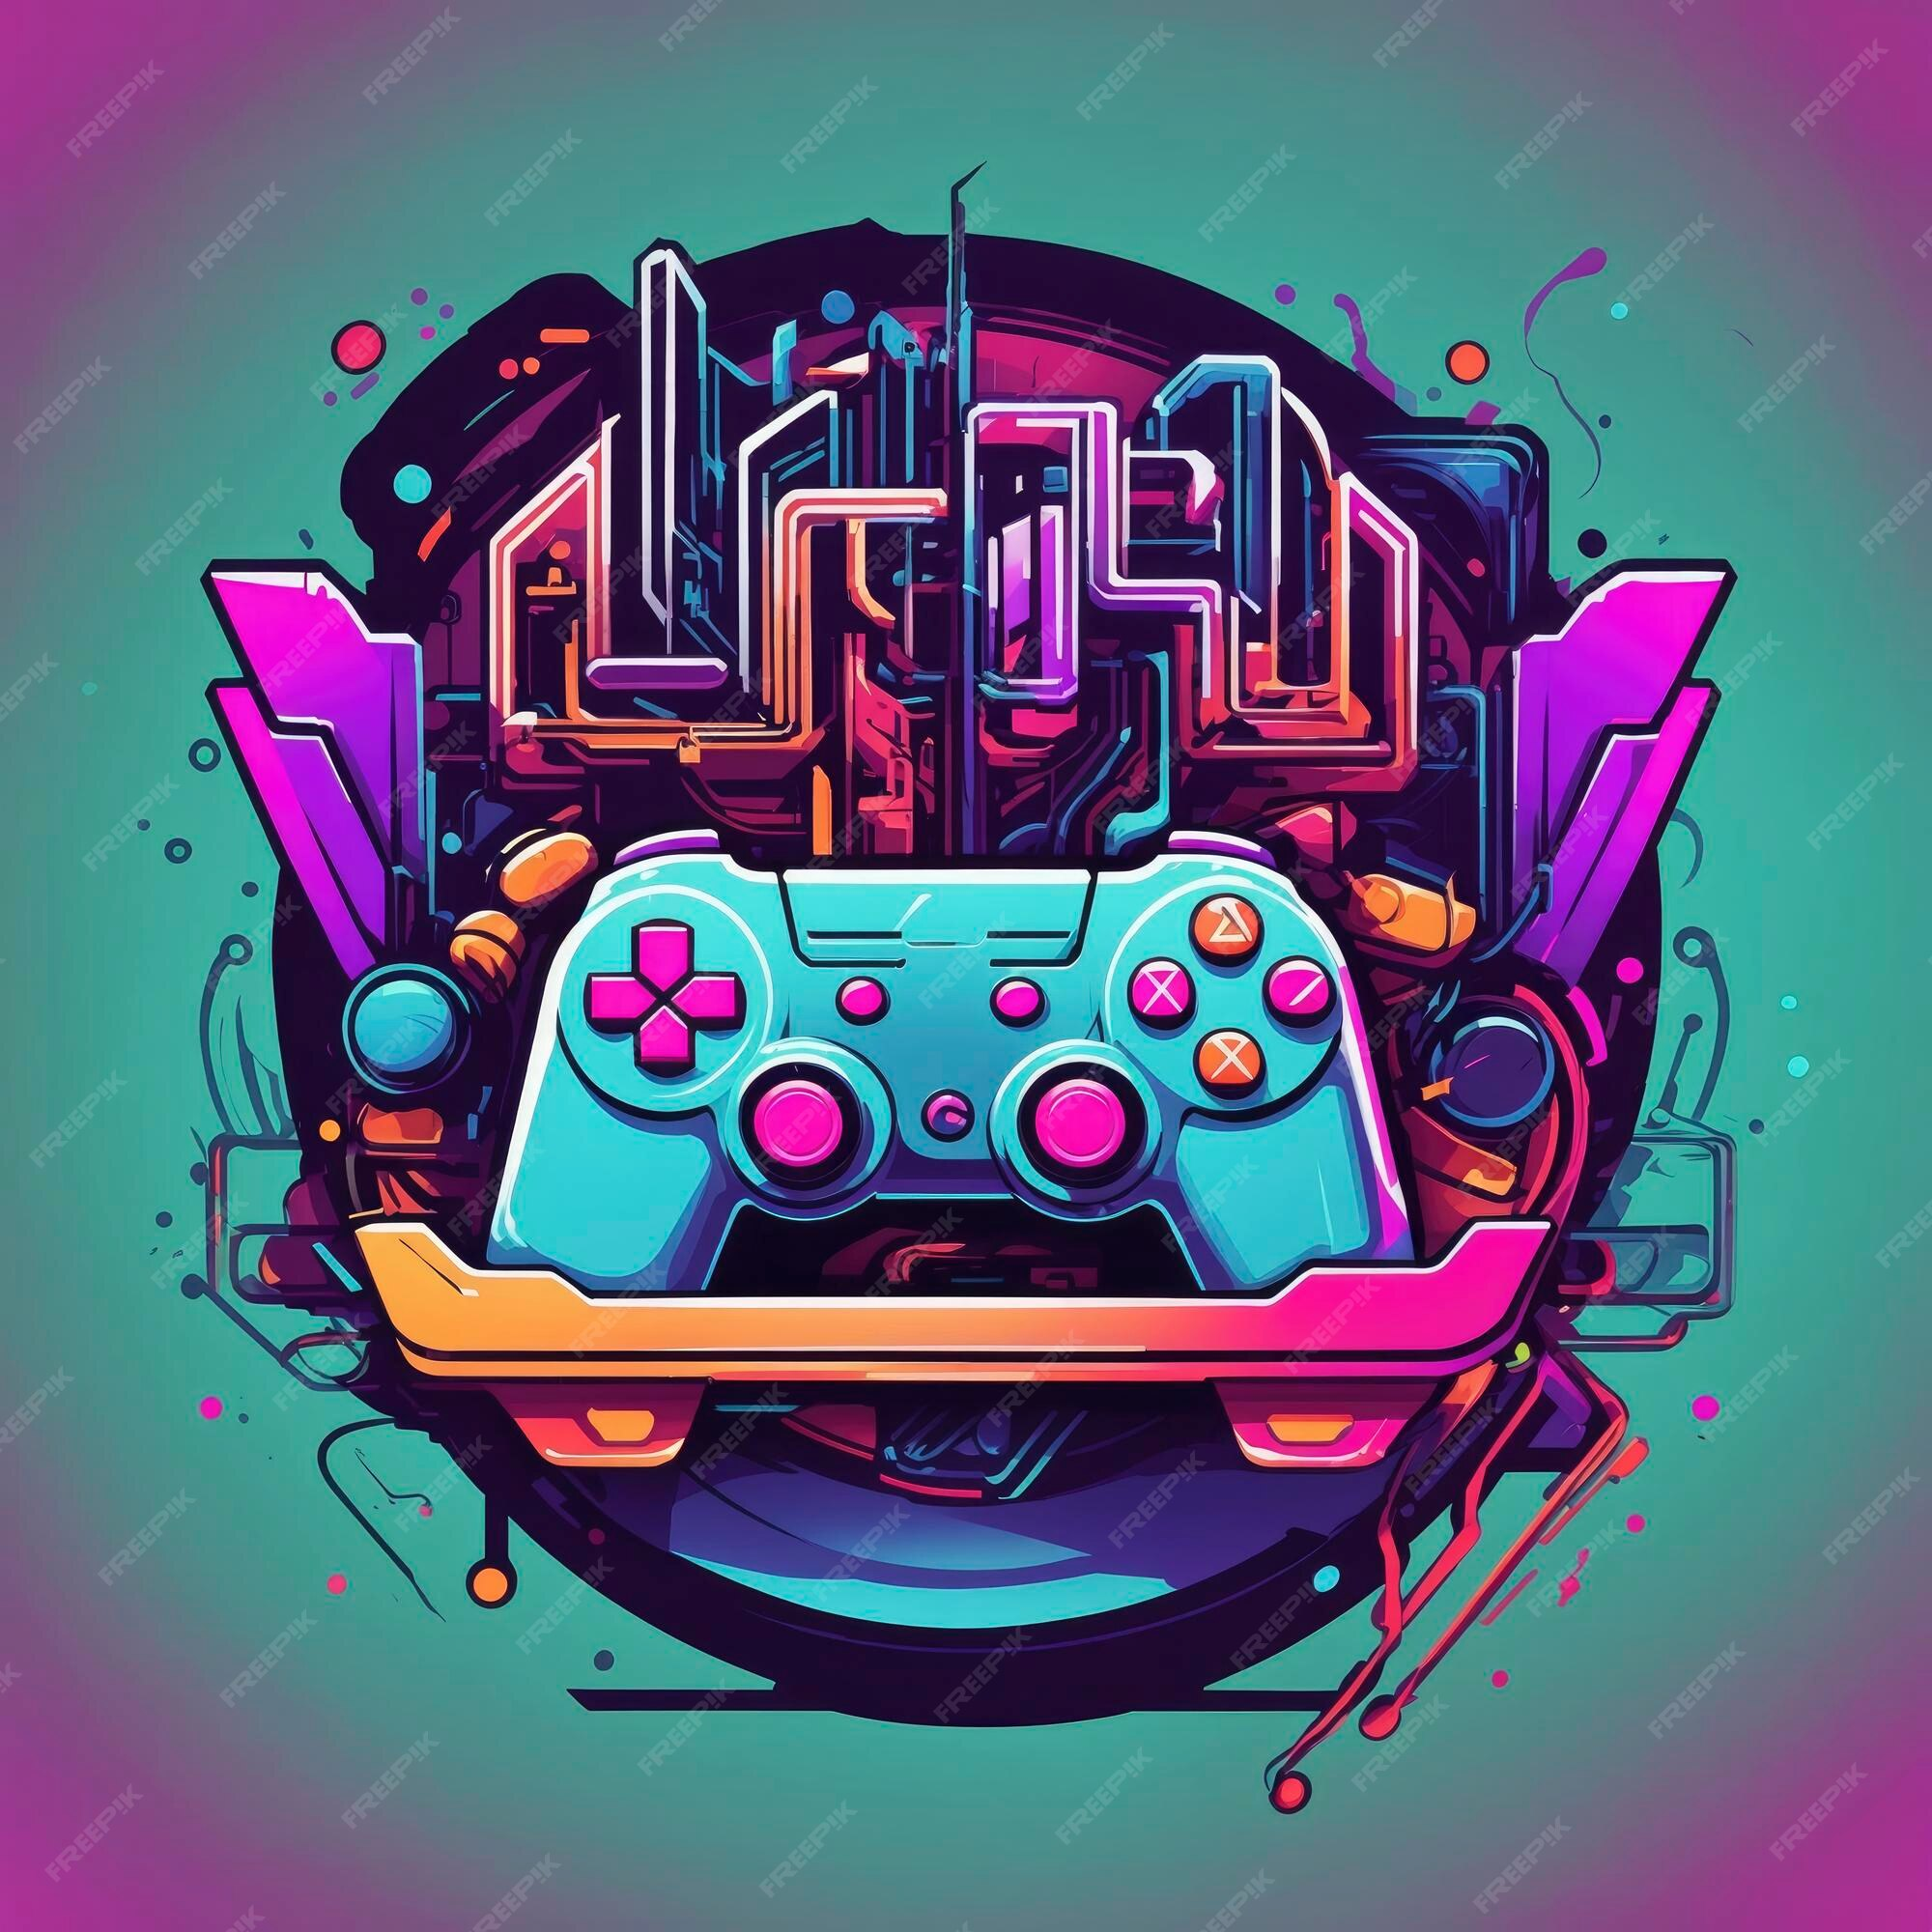

# ***Projeto: Games & Numbers*** 

**Explorando o sucesso dos videogames por meio da análise de dados**

*Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.*

*Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017. (O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.) O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.*

*Aqui, algumas  perguntas que responderemos com base em dados estatísticos, gráficos e testes de hipóteses:* 

- *Qual é o ciclo de vida de um jogo?*
- *Como podemos descobrir quais jogos geraram mais receita?*
- *Quais jogos receberam mais avaliações?*
- *Como as avaliações dos usuários e da crítica influenciam nas vendas?*

*Prepare-se para uma emocionante jornada  de análise e descoberta de dados à medida que exploramos o mundo dos jogos, jogue e responda a essas perguntas e muito mais!!*

## Dicionário de dados

**A tabela games (dados sobre jogos):**
- `Name` — (nome) — tipo object
- `Platform` — (plataforma) — tipo object
- `Year_of_Release` — (Ano de lançamento) — tipo float64
- `Genre` — (gênero) — tipo object
- `NA_sales` — (vendas norte-americanas em milhões de USD) — tipo float64
- `EU_sales` — (vendas na Europa em milhões de USD) — tipo float64
- `JP_sales` — (vendas no Japão em milhões de USD) — tipo float64
- `Other_sales` — (vendas em outros países em em milhões de USD) — tipo float64
- `Critic_Score` — (Pontuação crítica) (máximo de 100) — tipo float64
- `User_Score` — (Pontuação do usuário) (máximo de 10) — tipo object
- `Classificação` — (ESRB) — tipo object

# *Iniciando Projeto*

In [1]:
!pip install squarify

In [2]:
# importando bibliotecas principais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

# bibliotecas secundárias
import squarify

In [5]:
# carregando dados
df_games = pd.read_csv('/datasets/games.csv')

In [6]:
# olhando as primeiras linhas do dataframe
df_games.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [7]:
# explorando os dados
df_games.sample(12)

Name Platform  \
1938                                        Freekstyle      PS2   
15730                               TMNT: Mutant Melee       XB   
6014                             Heroes of the Pacific      PS2   
9980                  Dorabase 2: Nettou Ultra Stadium       DS   
4586                                  American Chopper      PS2   
16266                              Shepherd's Crossing      PSP   
3756                           NCAA March Madness 2005      PS2   
919                                   Hot Shots Golf 2       PS   
11751                                 Yoru no Nai Kuni      PSV   
10164                                  ESPN NHL Hockey       XB   
15935           Final Fantasy XI: All-In-One Pack 2006     X360   
11792  Famicom Mini: Hikari Shinwa: Palutena no Kagami      GBA   

       Year_of_Release         Genre  NA_sales  EU_sales  JP_sales  \
1938            2002.0        Racing      0.52      0.41      0.00   
15730           2005.0      Fighting      0.01      0.00      0.00   
6014            2005.0    Simulation      0.14      0.11      0.00   
9980            2009.0        Sports      0.00      0.00      0.12   
4586            2004.0        Racing      0.35      0.01      0.00   
16266           2009.0    Simulation      0.00      0.00      0.01   
3756            2004.0        Sports      0.44      0.02      0.00   
919             1999.0        Sports      0.25      0.12      1.48   
11751           2015.0  Role-Playing      0.00      0.00      0.08   
10164           2003.0        Sports      0.08      0.02      0.00   
15935           2006.0  Role-Playing      0.00      0.00      0.02   
11792           2004.0      Platform      0.00      0.00      0.07   

       Other_sales  Critic_Score User_Score Rating  
1938          0.14          81.0        7.3      E  
15730         0.00          43.0        4.8      T  
6014          0.04          76.0        8.4      T  
9980          0.00           NaN        NaN    NaN  
4586          0.06          47.0        7.5      T  
16266         0.00           NaN        tbd      E  
3756          0.07          78.0        8.3      E  
919           0.03           NaN        NaN    NaN  
11751         0.00           NaN        NaN    NaN  
10164         0.00          88.0        8.4      E  
15935         0.00           NaN        NaN    NaN  
11792         0.00           NaN        NaN    NaN

In [8]:
# verificando os nomes das colunas
df_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [9]:
# transformando os nomes das colunas em lower case
df_games.columns = df_games.columns.str.lower()

df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
# informações gerais
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
# tamanho do df_games
df_games.shape

(16715, 11)

In [12]:
# algumas métricas das colunas numéricas
df_games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [13]:
# verificando dados duplicados
df_games.duplicated().sum()

0

In [14]:
# verificando valores ausentes em df_games
df_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Overview:**

- *os nomes das colunas foram alterados para lower case*
- *sem duplicados no dataframe*
- *as colunas `name`, `year_of_release`, `genre`, `critic_score`, `user_score` e `rating` possuem muitos dados ausentes, que trataremos a seguir*

# *Iniciando limpeza e tratamento dos dados*

### *Coluna name*

In [15]:
# verificando o tamanho da coluna name
len(df_games.name.unique())

11560

In [16]:
# verificando os valores únicos
df_games.name.unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [17]:
# verificando valores ausentes em name
df_games.name.isna().sum()

2

In [18]:
# localizando os valores ausentes
df_games.loc[df_games['name'].isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [19]:
# procurando por mais informações
df_games.loc[df_games['platform'] == 'GEN']
df_games.loc[(df_games['platform'] == 'GEN') & (df_games['year_of_release'] == 1993)]

name platform  \
659                                                  NaN      GEN   
7885                                    Shining Force II      GEN   
8893                             Super Street Fighter II      GEN   
11986                            Ecco: The Tides of Time      GEN   
12098  Street Fighter II': Special Champion Edition (...      GEN   
12264                                  Streets of Rage 3      GEN   
12984                                    Dynamite Headdy      GEN   
13343                                       Beyond Oasis      GEN   
14244                                                NaN      GEN   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
659             1993.0           NaN      1.78      0.53      0.00   
7885            1993.0      Strategy      0.00      0.00      0.19   
8893            1993.0      Fighting      0.00      0.00      0.15   
11986           1993.0     Adventure      0.00      0.00      0.07   
12098           1993.0        Action      0.00      0.00      0.07   
12264           1993.0        Action      0.00      0.00      0.07   
12984           1993.0      Platform      0.00      0.00      0.05   
13343           1993.0  Role-Playing      0.00      0.00      0.05   
14244           1993.0           NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
7885          0.00           NaN        NaN    NaN  
8893          0.00           NaN        NaN    NaN  
11986         0.00           NaN        NaN    NaN  
12098         0.00           NaN        NaN    NaN  
12264         0.00           NaN        NaN    NaN  
12984         0.00           NaN        NaN    NaN  
13343         0.00           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

In [20]:
# preenchendo os dados ausentes com unknown
df_games['name'] = df_games['name'].fillna('Unknown')

In [22]:
# os top 15 jogos multiplataformas
count = df_games.groupby('name').size().reset_index(name='contagem')
top_15 = count.sort_values(by='contagem', ascending=False).head(15)

top_15

name  contagem
6715   Need for Speed: Most Wanted        12
5143      LEGO Marvel Super Heroes         9
7785                   Ratatouille         9
2952                       FIFA 14         9
5470                 Madden NFL 07         9
5140           LEGO Jurassic World         8
349          Angry Birds Star Wars         8
5211  Lego Batman 3: Beyond Gotham         8
5156               LEGO The Hobbit         8
5471                 Madden NFL 08         8
2969                FIFA Soccer 13         8
9990      The LEGO Movie Videogame         8
1306                          Cars         8
2953                       FIFA 15         8
9763                      Terraria         8

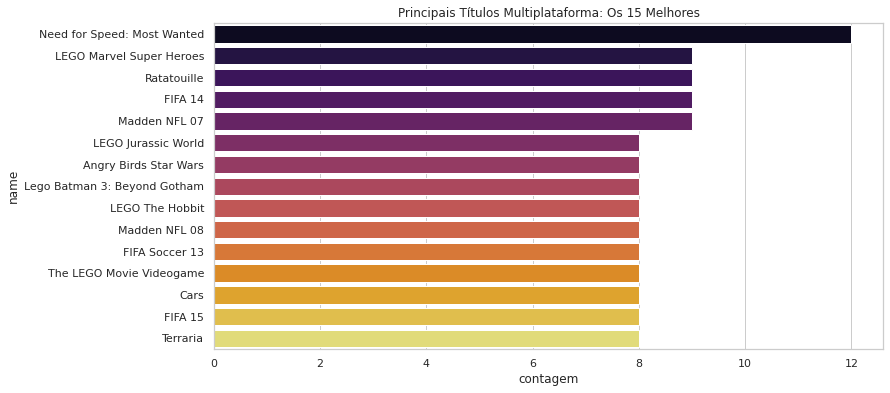

In [23]:
# plot do gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='contagem', y='name', data=top_15, palette='inferno')
plt.title('Principais Títulos Multiplataforma: Os 15 Melhores')
plt.show()

**Overview da coluna name:**

- *apenas 2 games não tinham nome, fizemos uma pesquisa no dataframe mas preenchemos com `unknown`*
- *criamos uma nuvem de palavras com os nomes*
- *Os jogos  `colection`, `battle`, `legend`, `adventure`, `world`, `star wars`, `portable` e `II` aperecem com muita frequência*
- *`Need for Speed` foi lançado no maior número de plataformas*
- *Jogos da séria `FIFA` e `LEGO` tem muita suma relevância no mercado de games também*

### *Coluna platform*

In [24]:
# informações gerais
df_games[['platform']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   platform  16715 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


In [25]:
# mais informações
df_games.platform.describe()

count     16715
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

In [26]:
# verificando os valores únicos
df_games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [27]:
# alterando apenas um nome para ATARI
df_games.platform = df_games.platform.replace('2600', 'ATARI')

In [28]:
# calculando
platform_counts = df_games['platform'].value_counts()
platform_counts = platform_counts.sort_values(ascending=False).head(20)
platform_counts = platform_counts.reset_index()

platform_counts

index  platform
0     PS2      2161
1      DS      2151
2     PS3      1331
3     Wii      1320
4    X360      1262
5     PSP      1209
6      PS      1197
7      PC       974
8      XB       824
9     GBA       822
10     GC       556
11    3DS       520
12    PSV       430
13    PS4       392
14    N64       319
15   XOne       247
16   SNES       239
17    SAT       173
18   WiiU       147
19  ATARI       133

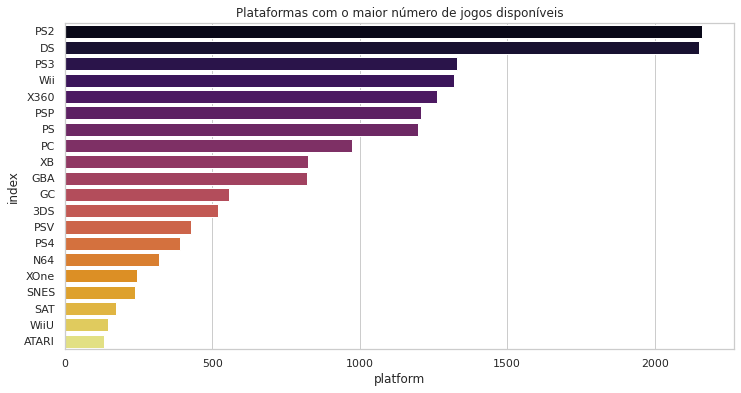

In [29]:
# plot do gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='platform', y='index', data=platform_counts, palette='inferno')
plt.title('Plataformas com o maior número de jogos disponíveis')
plt.show()

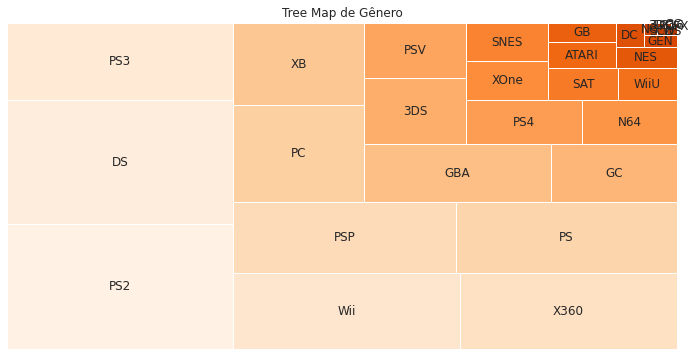

In [31]:
# plot do tree map
platform_counts = df_games['platform'].value_counts()

colors = sns.color_palette('Oranges', len(platform_counts))

plt.figure(figsize=(12, 6))
squarify.plot(sizes=platform_counts, label=platform_counts.index, color= colors, alpha=1)
plt.axis('off')
plt.title('Tree Map de Gênero')
plt.show()

**Overview de platform:**

- *sem valores ausentes*
- *alteramos apenas 1 nome, para algo mais expressivo, 2600 para 'ATARI'*
- *gráfico de barras da coluna `platform`*
- *`PS2` e `Nintendo DS` (plataforma portátil) possuem maior concentração de games*
- *criamos um tree map para visualizar melhor a coluna, plataformas de `PS3`, `DS` e `PS2` são as mais relevantes; plataformas de `DC`, `GEN` e `GB` são os menos significativos*

### *Coluna year_of_release*

In [32]:
# informações gerais
df_games[['year_of_release']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16446 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


In [34]:
# mais informações
df_games.year_of_release.describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [35]:
# verificando valores ausentes
df_games.year_of_release.isna().sum()

269

In [36]:
# verifcando valores únicos
df_games.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [37]:
# calculando a média
df_games.year_of_release.mean()

2006.4846163200777

In [38]:
# calculando a mediana
df_games.year_of_release.median()

2007.0

In [39]:
# criando coluna total_sales
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

In [40]:
# filtrando para analisar melhor year_of_release com base em total sales
filtered_df = df_games.loc[df_games.year_of_release.isna()]
filtered_df.head(10).sort_values(by='total_sales', ascending=False)

name platform  year_of_release  \
183                              Madden NFL 2004      PS2              NaN   
377                             FIFA Soccer 2004      PS2              NaN   
456                   LEGO Batman: The Videogame      Wii              NaN   
475                   wwe Smackdown vs. Raw 2006      PS2              NaN   
609                               Space Invaders    ATARI              NaN   
627                                    Rock Band     X360              NaN   
657     Frogger's Adventures: Temple of the Frog      GBA              NaN   
678  LEGO Indiana Jones: The Original Adventures      Wii              NaN   
719                               Call of Duty 3      Wii              NaN   
805                                    Rock Band      Wii              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183     Sports      4.26      0.26      0.01         0.71          94.0   
377     Sports      0.59      2.36      0.04         0.51          84.0   
456     Action      1.80      0.97      0.00         0.29          74.0   
475   Fighting      1.57      1.02      0.00         0.41           NaN   
609    Shooter      2.36      0.14      0.00         0.03           NaN   
627       Misc      1.93      0.33      0.00         0.21          92.0   
657  Adventure      2.15      0.18      0.00         0.07          73.0   
678     Action      1.51      0.61      0.00         0.21          78.0   
719    Shooter      1.17      0.84      0.00         0.23          69.0   
805       Misc      1.33      0.56      0.00         0.20          80.0   

    user_score rating  total_sales  
183        8.5      E         5.24  
377        6.4      E         3.50  
456        7.9   E10+         3.06  
475        NaN    NaN         3.00  
609        NaN    NaN         2.53  
627        8.2      T         2.47  
657        tbd      E         2.40  
678        6.6   E10+         2.33  
719        6.7      T         2.24  
805        6.3      T         2.09

In [41]:
# verificando proporção de ausentes
print(f'A proporção de valores ausentes na coluna "year_of_release" é de: {round(filtered_df.shape[0] / df_games.shape[0] * 100, 2)} %')

A proporção de valores ausentes na coluna "year_of_release" é de: 1.61 %


In [42]:
# verificando vendas totais dos games sem data de lançamento
filtered_df.total_sales.sum()

98.91999999999999

*Linhas com valores ausentes na coluna `year_of_release` são relevantes demais em valores monetários para serem excluídas.*

In [43]:
# criando função para extrair informações
def extract_year(name):
    try:
        year = int(''.join(filter(str.isdigit, name)))
        if 1980 <= year <= 2017:
            return year
        else:
            return None
    except:
        return None

In [44]:
# aplicando a função
df_games['extracted_year'] = df_games['name'].apply(extract_year)

In [45]:
# inserindo datas presentes nos títulos dos jogos
df_games['year_of_release'].fillna(df_games['extracted_year'], inplace=True)

In [46]:
# removendo uma coluna
df_games.drop(columns=['extracted_year'], inplace=True)

In [47]:
# verificando valores ausentes restantes
df_games.year_of_release.isna().sum()

251

In [48]:
# preenchendo o restante com mediana
median_yor = df_games['year_of_release'].median()
df_games['year_of_release'].fillna(median_yor, inplace=True)

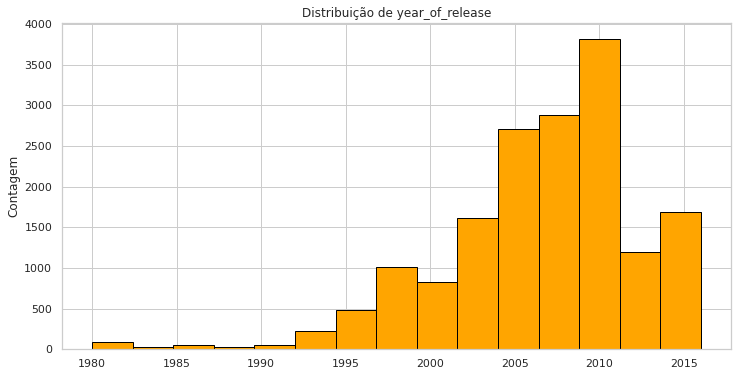

In [49]:
# plot de um histograma
plt.figure(figsize=(12, 6))
plt.hist(df_games['year_of_release'], bins=15, color='orange', edgecolor='black')
plt.ylabel('Contagem')
plt.title('Distribuição de year_of_release')
plt.show()

**Overview da coluna year_of_release:**

- *quase 2% de valores ausentes nesta coluna*
- *como tínhamos algumas informações nos títulos dos games, extraímos alguns, o restante com a mediana*
- *através do histograma certifica-se o pico de lançamento de jogos em 2010*
- *seguido por uma queda abrupta*

### *Coluna genre*

In [50]:
# informações gerais
df_games[['genre']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genre   16713 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


In [51]:
# mais informações
df_games.genre.describe()

count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object

In [52]:
# verificando os valores únicos
df_games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [53]:
# localizando os valores ausentes em genre
df_games.loc[df_games.genre.isna()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    Unknown      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  Unknown      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  total_sales  
659           0.08           NaN        NaN    NaN         2.39  
14244         0.00           NaN        NaN    NaN         0.03

In [54]:
# substituindo
df_games['genre'] = df_games['genre'].fillna('Misc')

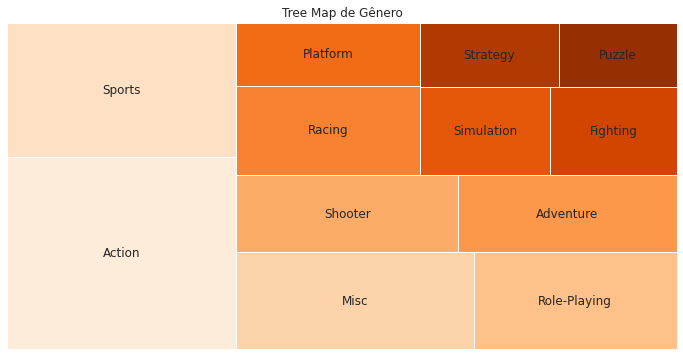

In [56]:
# plot do tree map
genre_counts = df_games['genre'].value_counts()

colors = sns.color_palette('Oranges', len(genre_counts))

plt.figure(figsize=(12, 6))
squarify.plot(sizes=genre_counts, label=genre_counts.index, color= colors, alpha=1)
plt.axis('off')
plt.title('Tree Map de Gênero')
plt.show()

*Overview da coluna genre:*
- *coluna em formato adequado*
- *apenas 2 valores ausentes, fizemos os ajustes necessários*
- *criamos um tree map para visualizar melhor a coluna, gênero de `Action` e `Sports` são os mais relevantes, jogos de `Puzzle` e `Strategy` são os menos significativos*

### *Coluna na_sales*

In [57]:
# informações gerais
df_games[['na_sales']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   na_sales  16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


In [58]:
# mais informações
df_games.na_sales.describe()

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [59]:
# verificando os valores ausentes em na_sales
df_games.na_sales.isna().sum()

0

In [60]:
# reorganizando colunas
df_games_reorder = df_games[['name', 'platform', 'year_of_release', 'genre', 
                              'total_sales', 'na_sales', 'eu_sales', 'jp_sales', 
                              'other_sales', 'critic_score', 'user_score', 'rating']]

In [61]:
# localizando 10 top games vendas em na_sales
top_ten_na_sales = df_games_reorder.sort_values(by='na_sales', ascending=False).head(10)

top_ten_na_sales

name platform  year_of_release     genre  \
0                  Wii Sports      Wii           2006.0    Sports   
1           Super Mario Bros.      NES           1985.0  Platform   
9                   Duck Hunt      NES           1984.0   Shooter   
5                      Tetris       GB           1989.0    Puzzle   
2              Mario Kart Wii      Wii           2008.0    Racing   
3           Wii Sports Resort      Wii           2009.0    Sports   
14         Kinect Adventures!     X360           2010.0      Misc   
8   New Super Mario Bros. Wii      Wii           2009.0  Platform   
7                    Wii Play      Wii           2006.0      Misc   
18          Super Mario World     SNES           1990.0  Platform   

    total_sales  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0         82.54     41.36     28.96      3.77         8.45          76.0   
1         40.24     29.08      3.58      6.81         0.77           NaN   
9         28.31     26.93      0.63      0.28         0.47           NaN   
5         30.26     23.20      2.26      4.22         0.58           NaN   
2         35.52     15.68     12.76      3.79         3.29          82.0   
3         32.77     15.61     10.93      3.28         2.95          80.0   
14        21.82     15.00      4.89      0.24         1.69          61.0   
8         28.32     14.44      6.94      4.70         2.24          87.0   
7         28.91     13.96      9.18      2.93         2.84          58.0   
18        20.62     12.78      3.75      3.54         0.55           NaN   

   user_score rating  
0           8      E  
1         NaN    NaN  
9         NaN    NaN  
5         NaN    NaN  
2         8.3      E  
3           8      E  
14        6.3      E  
8         8.4      E  
7         6.6      E  
18        NaN    NaN

In [62]:
# analisando onde na_sales é zero
df_games.loc[df_games['na_sales'] == 0].sort_values(by='total_sales', ascending=False).head(10)

name platform  \
215                           Monster Hunter Freedom 3      PSP   
340                                  Friend Collection       DS   
385                                   Monster Hunter 4      3DS   
403  English Training: Have Fun Improving Your Skills!       DS   
428               Dragon Quest VI: Maboroshi no Daichi     SNES   
530                 Dragon Quest V: Tenkuu no Hanayome     SNES   
563                             Yokai Watch 2 Shinuchi      3DS   
574                 Super Mario Bros.: The Lost Levels      NES   
632                                    Final Fantasy V     SNES   
674                            Dragon Warrior Monsters       GB   

     year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  \
215           2010.0  Role-Playing       0.0      0.00      4.87         0.00   
340           2009.0          Misc       0.0      0.00      3.67         0.00   
385           2013.0  Role-Playing       0.0      0.00      3.44         0.00   
403           2006.0          Misc       0.0      0.99      2.32         0.02   
428           1995.0  Role-Playing       0.0      0.00      3.19         0.00   
530           1992.0  Role-Playing       0.0      0.00      2.78         0.01   
563           2014.0  Role-Playing       0.0      0.00      2.68         0.00   
574           1986.0      Platform       0.0      0.00      2.65         0.00   
632           1992.0  Role-Playing       0.0      0.00      2.43         0.02   
674           1998.0  Role-Playing       0.0      0.00      2.34         0.01   

     critic_score user_score rating  total_sales  
215           NaN        NaN    NaN         4.87  
340           NaN        NaN    NaN         3.67  
385           NaN        NaN    NaN         3.44  
403           NaN        NaN    NaN         3.33  
428           NaN        NaN    NaN         3.19  
530           NaN        NaN    NaN         2.79  
563           NaN        NaN    NaN         2.68  
574           NaN        NaN    NaN         2.65  
632           NaN        NaN    NaN         2.45  
674           NaN        NaN    NaN         2.35

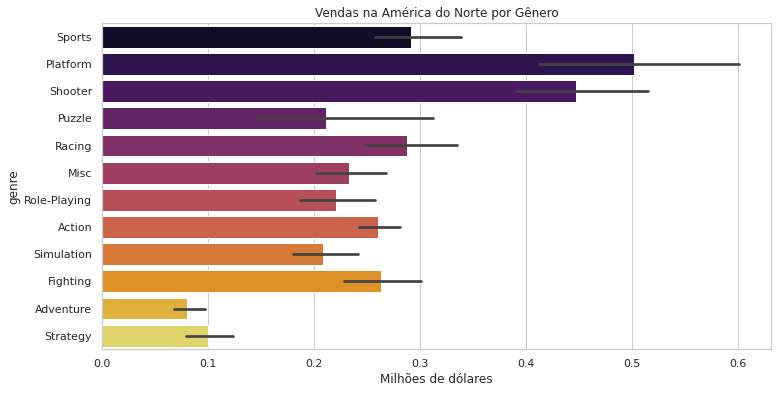

In [63]:
# plot na_sales x genre
df_games_na_sales = df_games.sort_values(by='na_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='na_sales', y='genre', data=df_games_na_sales, palette='inferno')
plt.title('Vendas na América do Norte por Gênero')
plt.xlabel('Milhões de dólares')
plt.show()

**Overview da coluna na_sales:**

- *sem valores ausentes*
- *grande diferença entre os valores de média e mediana e desvio padrão alto*
- *`Wii Sports`, lançado em 2006, vendeu mais de 41 milhões de dólares*
- *gêneros com maiores vendas na América do Norte são: `Platform`, `Shooter` e `Sports`*

### *Coluna eu_sales*

In [64]:
# informações gerais
df_games[['eu_sales']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   eu_sales  16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


In [65]:
# mais informações
df_games.eu_sales.describe()

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [66]:
# verificando os valores ausentes
df_games.eu_sales.isna().sum()

0

In [67]:
# localizando 10 top games vendas em eu_sales
top_ten_eu_sales = df_games_reorder.sort_values(by='eu_sales', ascending=False).head(10)
top_ten_eu_sales

name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
2                                 Mario Kart Wii      Wii           2008.0   
10                                    Nintendogs       DS           2005.0   
3                              Wii Sports Resort      Wii           2009.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
7                                       Wii Play      Wii           2006.0   
6                          New Super Mario Bros.       DS           2006.0   
16                            Grand Theft Auto V      PS3           2013.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
15                                  Wii Fit Plus      Wii           2009.0   

           genre  total_sales  na_sales  eu_sales  jp_sales  other_sales  \
0         Sports        82.54     41.36     28.96      3.77         8.45   
2         Racing        35.52     15.68     12.76      3.79         3.29   
10    Simulation        24.67      9.05     10.95      1.93         2.74   
3         Sports        32.77     15.61     10.93      3.28         2.95   
19          Misc        20.14      4.74      9.20      4.16         2.04   
7           Misc        28.91     13.96      9.18      2.93         2.84   
6       Platform        29.80     11.28      9.14      6.50         2.88   
16        Action        21.05      7.02      9.09      0.98         3.96   
4   Role-Playing        31.38     11.27      8.89     10.22         1.00   
15        Sports        21.80      9.01      8.49      2.53         1.77   

    critic_score user_score rating  
0           76.0          8      E  
2           82.0        8.3      E  
10           NaN        NaN    NaN  
3           80.0          8      E  
19          77.0        7.9      E  
7           58.0        6.6      E  
6           89.0        8.5      E  
16          97.0        8.2      M  
4            NaN        NaN    NaN  
15          80.0        7.4      E

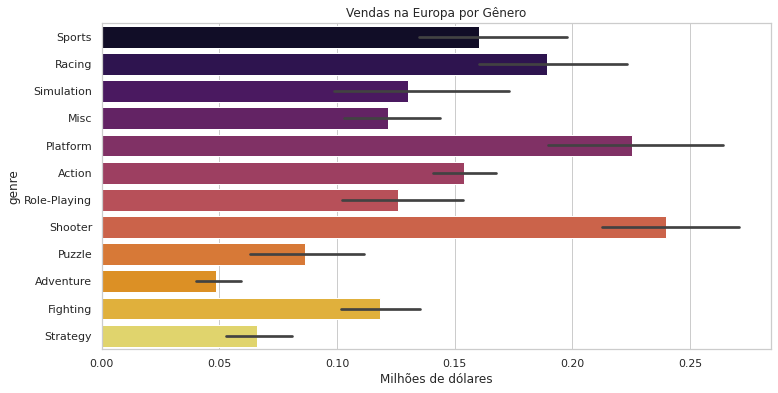

In [68]:
# plot eu_sales x genre
df_games_eu_sales = df_games.sort_values(by='eu_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='eu_sales', y='genre', data=df_games_eu_sales, palette='inferno')
plt.title('Vendas na Europa por Gênero')
plt.xlabel('Milhões de dólares')
plt.show()

**Overview da coluna eu_sales:**

- *novamente sem dados ausentes*
- *média e mediana com valores muito distantes*
- *`Wii Sports`, outra vez como líder de vendas*
- *gêneros com maiores vendas na Europa são: `Shooter`, `Platform` e `Racing`*

### *Coluna jp_sales*

In [69]:
# informações gerais
df_games[['jp_sales']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   jp_sales  16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


In [70]:
# mais informações
df_games.jp_sales.describe()

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [71]:
# verificando por valores ausentes
df_games.jp_sales.isna().sum()

0

In [72]:
# top ten de vendas em jp_sales
top_ten_jp_sales = df_games.sort_values(by='jp_sales', ascending=False).head(10)
top_ten_jp_sales

name platform  year_of_release  \
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
1                              Super Mario Bros.      NES           1985.0   
6                          New Super Mario Bros.       DS           2006.0   
20                 Pokemon Diamond/Pokemon Pearl       DS           2006.0   
27                   Pokemon Black/Pokemon White       DS           2010.0   
25                 Pokemon Ruby/Pokemon Sapphire      GBA           2002.0   
43                   Animal Crossing: Wild World       DS           2005.0   
26   Brain Age 2: More Training in Minutes a Day       DS           2005.0   
215                     Monster Hunter Freedom 3      PSP           2010.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
4    Role-Playing     11.27      8.89     10.22         1.00           NaN   
12   Role-Playing      9.00      6.18      7.20         0.71           NaN   
1        Platform     29.08      3.58      6.81         0.77           NaN   
6        Platform     11.28      9.14      6.50         2.88          89.0   
20   Role-Playing      6.38      4.46      6.04         1.36           NaN   
27   Role-Playing      5.51      3.17      5.65         0.80           NaN   
25   Role-Playing      6.06      3.90      5.38         0.50           NaN   
43     Simulation      2.50      3.45      5.33         0.86          86.0   
26         Puzzle      3.43      5.35      5.32         1.18          77.0   
215  Role-Playing      0.00      0.00      4.87         0.00           NaN   

    user_score rating  total_sales  
4          NaN    NaN        31.38  
12         NaN    NaN        23.09  
1          NaN    NaN        40.24  
6          8.5      E        29.80  
20         NaN    NaN        18.24  
27         NaN    NaN        15.13  
25         NaN    NaN        15.84  
43         8.7      E        12.14  
26         7.1      E        15.28  
215        NaN    NaN         4.87

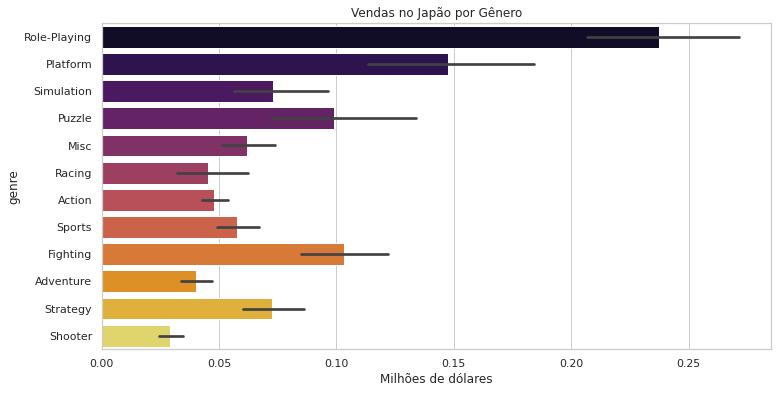

In [73]:
# plot jp_sales x genre
df_games_jp_sales = df_games.sort_values(by='jp_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='jp_sales', y='genre', data=df_games_jp_sales, palette='inferno')
plt.title('Vendas no Japão por Gênero')
plt.xlabel('Milhões de dólares')
plt.show()

**Overview da coluna jp_sales:**

- *sem valores ausentes*
- *50% do Top Ten são jogos `Pokemon`*
- *no Japão, as maiores vendas são em plataformas portáteis (DS, GB e GBA)*
- *gêneros com maiores vendas no Japão são: `Role-Playing`, `Platform` e `Fighting`*
- *a preferência, dos gêneros de games são mais singulares no mercado japonês*

### *Column other_sales*

In [74]:
# informações gerais
df_games[['other_sales']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   other_sales  16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


In [75]:
# mais informações
df_games.other_sales.describe()

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [76]:
# verificando os dados ausentes
df_games.other_sales.isna().sum()

0

In [77]:
# top 10 de vendas em other_sales
top_ten_other_sales = df_games.sort_values(by='other_sales', ascending=False).head(10)
top_ten_other_sales

name platform  year_of_release       genre  \
17   Grand Theft Auto: San Andreas      PS2           2004.0      Action   
0                       Wii Sports      Wii           2006.0      Sports   
48                  Gran Turismo 4      PS2           2004.0      Racing   
16              Grand Theft Auto V      PS3           2013.0      Action   
2                   Mario Kart Wii      Wii           2008.0      Racing   
3                Wii Sports Resort      Wii           2009.0      Sports   
349      Pro Evolution Soccer 2008      PS2           2007.0      Sports   
6            New Super Mario Bros.       DS           2006.0    Platform   
7                         Wii Play      Wii           2006.0        Misc   
10                      Nintendogs       DS           2005.0  Simulation   

     na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
17       9.43      0.40      0.41        10.57          95.0          9   
0       41.36     28.96      3.77         8.45          76.0          8   
48       3.01      0.01      1.10         7.53          89.0        8.5   
16       7.02      9.09      0.98         3.96          97.0        8.2   
2       15.68     12.76      3.79         3.29          82.0        8.3   
3       15.61     10.93      3.28         2.95          80.0          8   
349      0.05      0.00      0.64         2.93          82.0        7.9   
6       11.28      9.14      6.50         2.88          89.0        8.5   
7       13.96      9.18      2.93         2.84          58.0        6.6   
10       9.05     10.95      1.93         2.74           NaN        NaN   

    rating  total_sales  
17       M        20.81  
0        E        82.54  
48       E        11.65  
16       M        21.05  
2        E        35.52  
3        E        32.77  
349      E         3.62  
6        E        29.80  
7        E        28.91  
10     NaN        24.67

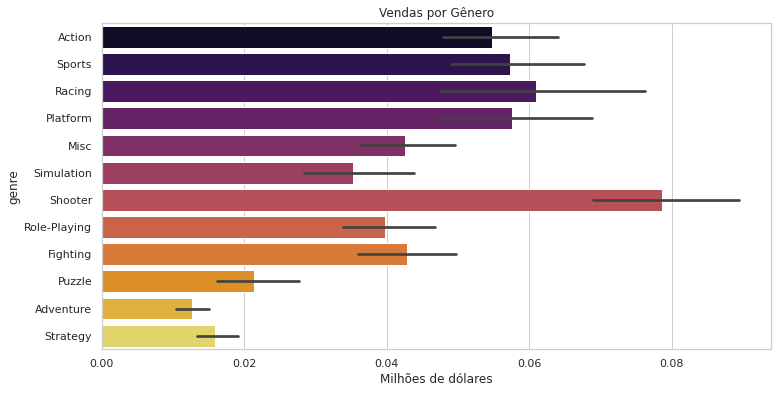

In [78]:
# plot other_sales x genre
df_games_other_sales = df_games.sort_values(by='other_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='other_sales', y='genre', data=df_games_other_sales, palette='inferno')
plt.title('Vendas por Gênero')
plt.xlabel('Milhões de dólares')
plt.show()

**Overview da coluna other_sales:**

- *sem valores ausentes*
- *`Grand Theft Auto: San Andreas` é o líder de vendas*
- *Shooter é o gênero mais expressivo*

### *Coluna total_sales*

In [79]:
# informações gerais
df_games[['total_sales']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_sales  16715 non-null  float64
dtypes: float64(1)
memory usage: 130.7 KB


In [80]:
# mais informações
df_games.total_sales.describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [81]:
# verificando os dados ausentes
df_games.total_sales.isna().sum()

0

In [82]:
# top 10 de total_sales
top_ten_total_sales = df_games.sort_values(by='total_sales', ascending=False).head(10)
top_ten_total_sales

name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0     41.36     28.96      3.77         8.45          76.0          8      E   
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN   
2     15.68     12.76      3.79         3.29          82.0        8.3      E   
3     15.61     10.93      3.28         2.95          80.0          8      E   
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN   
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN   
6     11.28      9.14      6.50         2.88          89.0        8.5      E   
7     13.96      9.18      2.93         2.84          58.0        6.6      E   
8     14.44      6.94      4.70         2.24          87.0        8.4      E   
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26  
6        29.80  
7        28.91  
8        28.32  
9        28.31

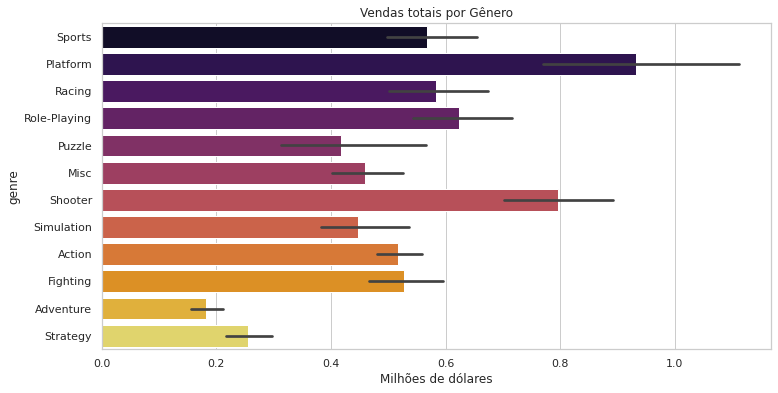

In [83]:
# plot other_sales x genre
df_games_total_sales = df_games.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='genre', data=df_games_total_sales, palette='inferno')
plt.title('Vendas totais por Gênero')
plt.xlabel('Milhões de dólares')
plt.show()

**Overview da coluna total_sales:**

- *gênero com menor vendas totais é Adventures*
- *gêneros com maiores vendas totais são: Platform, Shooter e Role-Playing*
- *`Wii Sports` com o dobro do 2° no top ten*

### *Coluna critic_score*

In [84]:
# informações gerais
df_games[['critic_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  8137 non-null   float64
dtypes: float64(1)
memory usage: 130.7 KB


In [85]:
# mais informações
df_games.critic_score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [86]:
# muitos valores ausentes
df_games.critic_score.isna().sum()

8578

In [87]:
# reordenando e verificando
df_games_reorder_cs = df_games[['name', 'critic_score', 'user_score', 'rating', 'platform', 'year_of_release', 'genre', 'total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

df_games_reorder_cs.sample(15)

name  critic_score  \
4106   Transformers: Revenge of the Fallen (XBox 360,...           NaN   
9644                    World Soccer Winning Eleven 2002           NaN   
3879                Sonic & All-Stars Racing Transformed           NaN   
6192                                           NES Remix          71.0   
5368             The Fairly Odd Parents: Shadow Showdown           NaN   
12619                     Hi Hi Puffy AmiYumi: Kaznapped           NaN   
14433                                           RoadKill          64.0   
5204                             Marvel Super Hero Squad          49.0   
9497                                        Ape Escape 3          77.0   
13261                                 Johnny Bazookatone           NaN   
835                            Need for Speed: ProStreet          73.0   
1677                              Farming Simulator 2015           NaN   
8074                                  Six Flags Fun Park          34.0   
730                             LEGO Marvel Super Heroes          80.0   
1817               The Legend of Zelda: Tri Force Heroes          73.0   

      user_score rating platform  year_of_release       genre  total_sales  \
4106         NaN    NaN      Wii           2009.0     Shooter         0.48   
9644         NaN    NaN       PS           2002.0      Sports         0.13   
3879         NaN    NaN     WiiU           2012.0      Racing         0.51   
6192         7.1      E     WiiU           2014.0      Action         0.27   
5368         NaN    NaN      GBA           2004.0    Platform         0.35   
12619        NaN    NaN      GBA           2005.0      Action         0.06   
14433        tbd      M       GC           2003.0      Action         0.03   
5204         6.2   E10+      Wii           2009.0    Fighting         0.36   
9497         8.5   E10+      PS2           2005.0    Platform         0.13   
13261        NaN    NaN       PS           1995.0    Platform         0.05   
835            6   E10+      PS3           2007.0      Racing         2.04   
1677         NaN    NaN       PC           2014.0  Simulation         1.19   
8074           7      E       DS           2008.0        Misc         0.18   
730          7.6   E10+     X360           2013.0      Action         2.22   
1817         7.6      E      3DS           2015.0      Action         1.11   

       na_sales  eu_sales  jp_sales  other_sales  
4106       0.24      0.19      0.00         0.05  
9644       0.00      0.00      0.12         0.01  
3879       0.19      0.26      0.02         0.04  
6192       0.17      0.00      0.08         0.02  
5368       0.25      0.09      0.00         0.01  
12619      0.04      0.02      0.00         0.00  
14433      0.02      0.01      0.00         0.00  
5204       0.30      0.03      0.00         0.03  
9497       0.06      0.05      0.00         0.02  
13261      0.03      0.02      0.00         0.00  
835        0.73      0.91      0.04         0.36  
1677       0.08      1.04      0.00         0.07  
8074       0.17      0.00      0.00         0.01  
730        1.24      0.79      0.00         0.19  
1817       0.53      0.33      0.17         0.08

*Muitos valores ausentes na coluna critic_score. Iremos analisar como trataremos estes valores.*

In [88]:
# filtrando onde os valores são nulos
filtered_df = df_games_reorder_cs.loc[df_games['critic_score'].isna()]

filtered_df.sample(10)

name  critic_score user_score rating  \
5203   Mystical Ninja starring Goemon           NaN        NaN    NaN   
14976        Rock 'N' Roll Adventures           NaN        tbd      E   
732                   Resident Evil 4           NaN        NaN    NaN   
14092                    Jane's Hotel           NaN        tbd      E   
3421             Kirby's Dream Course           NaN        NaN    NaN   
8001           Imagine: Babyz Fashion           NaN        tbd      E   
7779        The Rise of the Argonauts           NaN        NaN    NaN   
3060                 Legend of Legaia           NaN        NaN    NaN   
9540                       Puppies 3D           NaN        tbd      E   
7603                   Snowboard Kids           NaN        NaN    NaN   

      platform  year_of_release         genre  total_sales  na_sales  \
5203       N64           1997.0        Action         0.36      0.07   
14976      Wii           2007.0      Platform         0.02      0.02   
732        Wii           2007.0        Action         2.22      1.32   
14092       DS           2010.0    Simulation         0.03      0.03   
3421      SNES           1994.0        Sports         0.59      0.00   
8001        DS           2009.0    Simulation         0.18      0.17   
7779       PS3           2008.0  Role-Playing         0.19      0.05   
3060        PS           1998.0  Role-Playing         0.66      0.37   
9540       3DS           2011.0          Misc         0.13      0.08   
7603       N64           1996.0        Sports         0.20      0.16   

       eu_sales  jp_sales  other_sales  
5203       0.02      0.23         0.04  
14976      0.00      0.00         0.00  
732        0.56      0.14         0.20  
14092      0.00      0.00         0.00  
3421       0.00      0.59         0.00  
8001       0.00      0.00         0.01  
7779       0.11      0.00         0.03  
3060       0.25      0.00         0.04  
9540       0.04      0.00         0.01  
7603       0.04      0.00         0.00

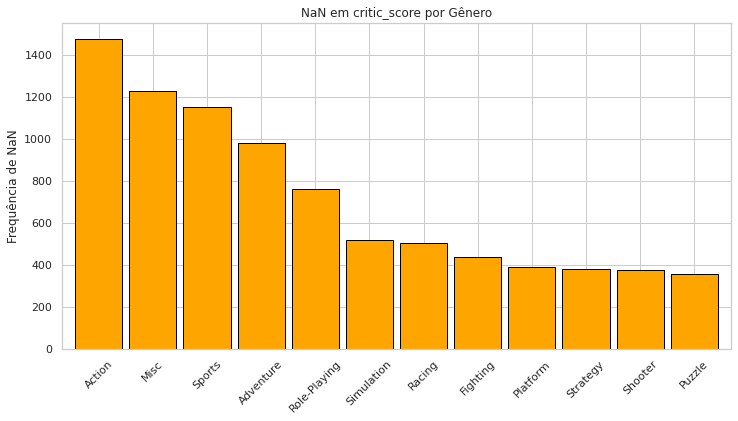

In [89]:
# filtrando frequência de valores Nan
nan_count_by_genre = filtered_df['genre'].value_counts()

# plot do gráfico de barras
plt.figure(figsize=(12, 6))
nan_count_by_genre.plot(kind='bar', color='orange', width = .87, edgecolor='black')
plt.ylabel('Frequência de NaN')
plt.title('NaN em critic_score por Gênero')
plt.xticks(rotation=45)
plt.show()

In [90]:
# filtrando para mais informações onde critic_score = 0
filtered_df_1 = df_games_reorder_cs.loc[df_games['critic_score'] == 0]

filtered_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             0 non-null      object 
 1   critic_score     0 non-null      float64
 2   user_score       0 non-null      object 
 3   rating           0 non-null      object 
 4   platform         0 non-null      object 
 5   year_of_release  0 non-null      float64
 6   genre            0 non-null      object 
 7   total_sales      0 non-null      float64
 8   na_sales         0 non-null      float64
 9   eu_sales         0 non-null      float64
 10  jp_sales         0 non-null      float64
 11  other_sales      0 non-null      float64
dtypes: float64(7), object(5)
memory usage: 0.0+ bytes


*Suporemos que os valores ausentes na coluna `critic_score` se devem à falta de avaliação. Portanto, os consideraremos como 0.*

In [91]:
# preenchendo com zero (0)
df_games['critic_score'] = df_games.critic_score.fillna(0)

*Analisando os gêneros que receberam melhores avaliações da crítica.*

In [92]:
# média de critic_score x genre
filtered_df_2 = df_games.groupby('genre')['critic_score'].mean()
filtered_df_2 = filtered_df_2.sort_values(ascending=False)

filtered_df_2

genre
Shooter         50.076342
Racing          40.375500
Platform        38.091216
Action          37.378747
Sports          36.597104
Role-Playing    35.744326
Fighting        33.345112
Strategy        31.874085
Simulation      27.667812
Puzzle          26.039655
Misc            19.886986
Adventure       16.194935
Name: critic_score, dtype: float64

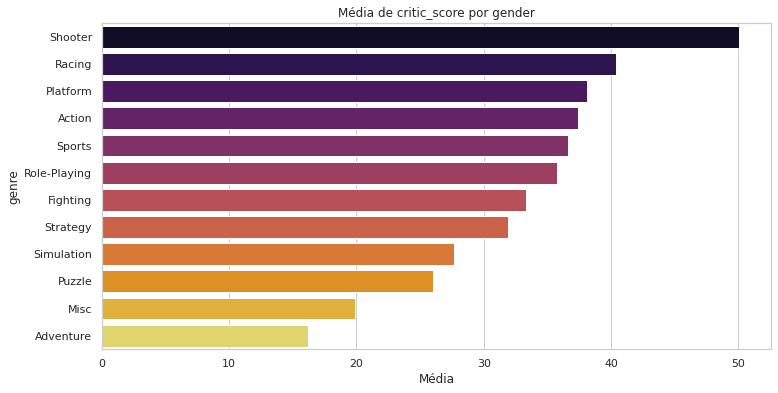

In [93]:
# plot do gráfico de barras
plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=filtered_df_2.values, y=filtered_df_2.index, orient='h', palette='inferno')
plt.xlabel('Média')
plt.title('Média de critic_score por gender')
plt.show()

**Overview da coluna critic_score:**

- *a coluna `critic_score` possui muitos valores ausentes, mais de 50% do dataframe*
- *gênero com maior frequência de valores nulos na coluna é `Action`*
- *tratamos os valores nulos considerando que não houve avaliação por parte da crítica*
- *maiores médias de avaliações da crítica são para os jogos do gênero de `Shooter`, `Racing` e `Platform`*
- *as piores médias são para `Adventure`, `Misc` e `Puzzle`*

### *Coluna user_score*

In [94]:
# informações gerais
df_games[['user_score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_score  10014 non-null  object
dtypes: object(1)
memory usage: 130.7+ KB


In [95]:
# mais informações
df_games.user_score.describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [96]:
# verificando os valores únicos
df_games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [97]:
# contando frequência de 'tbd'
len(df_games.loc[df_games['user_score'] == 'tbd'])

2424

In [98]:
# contando os valores ausentes
df_games.user_score.isna().sum()

6701

In [99]:
# proporção
percentage = (df_games.user_score.isna().sum() + len(df_games.loc[df_games['user_score'] == 'tbd'])) / df_games.shape[0]
percentage

0.5459168411606342

*Vamos considerar que `tbd`, que significa `to be determined` (a ser determinado), representa jogos que ainda não receberam avaliações dos usuários.*

*Portanto, para poder transformar a coluna em formato float e continuar nossas análises, substituiremos todos os valores `tbd` por `NaN` (Not a Number).*

In [100]:
# transformando e conferindo
df_games['user_score'] = df_games['user_score'].replace('tbd', float('nan'))
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [101]:
# alterando formato
df_games['user_score'] = df_games['user_score'].astype(float)

*Vamos criar uma nova coluna binária, na qual os jogos que foram avaliados pelos usuários serão representados como 1, enquanto os jogos que ainda não receberam avaliação serão representados como 0. Isso nos permitirá aplicar filtros futuros, se necessário, com base na presença ou ausência de avaliações dos usuários.*

In [102]:
# usando função lambda
df_games['received_score_from_users'] = df_games['user_score'].apply(lambda x: 0 if x == 'tdb' else 1)

In [103]:
# verificando e reordenando
df_games.received_score_from_users.unique()
df_games_reorder_us = df_games[['name', 'critic_score', 'user_score', 'received_score_from_users', 
                                'rating', 'platform', 'year_of_release', 'genre', 'total_sales', 
                                'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
df_games_reorder_us

name  critic_score  user_score  \
0                         Wii Sports          76.0         8.0   
1                  Super Mario Bros.           0.0         NaN   
2                     Mario Kart Wii          82.0         8.3   
3                  Wii Sports Resort          80.0         8.0   
4           Pokemon Red/Pokemon Blue           0.0         NaN   
...                              ...           ...         ...   
16710  Samurai Warriors: Sanada Maru           0.0         NaN   
16711               LMA Manager 2007           0.0         NaN   
16712        Haitaka no Psychedelica           0.0         NaN   
16713               Spirits & Spells           0.0         NaN   
16714            Winning Post 8 2016           0.0         NaN   

       received_score_from_users rating platform  year_of_release  \
0                              1      E      Wii           2006.0   
1                              1    NaN      NES           1985.0   
2                              1      E      Wii           2008.0   
3                              1      E      Wii           2009.0   
4                              1    NaN       GB           1996.0   
...                          ...    ...      ...              ...   
16710                          1    NaN      PS3           2016.0   
16711                          1    NaN     X360           2006.0   
16712                          1    NaN      PSV           2016.0   
16713                          1    NaN      GBA           2003.0   
16714                          1    NaN      PSV           2016.0   

              genre  total_sales  na_sales  eu_sales  jp_sales  other_sales  
0            Sports        82.54     41.36     28.96      3.77         8.45  
1          Platform        40.24     29.08      3.58      6.81         0.77  
2            Racing        35.52     15.68     12.76      3.79         3.29  
3            Sports        32.77     15.61     10.93      3.28         2.95  
4      Role-Playing        31.38     11.27      8.89     10.22         1.00  
...             ...          ...       ...       ...       ...          ...  
16710        Action         0.01      0.00      0.00      0.01         0.00  
16711        Sports         0.01      0.00      0.01      0.00         0.00  
16712     Adventure         0.01      0.00      0.00      0.01         0.00  
16713      Platform         0.01      0.01      0.00      0.00         0.00  
16714    Simulation         0.01      0.00      0.00      0.01         0.00  

[16715 rows x 13 columns]

*Analisaremos os gêneros que receberam melhores avaliações dos usuários.*

In [104]:
# filtrando e simplificando
filtered_df_3 = df_games_reorder_us.dropna(subset=['user_score'])
filtered_df_3 = filtered_df_3[['genre', 'user_score']]

In [105]:
# agrupando por genre
grouped_us = filtered_df_3.groupby('genre')['user_score'].mean()
grouped_us = grouped_us.sort_values(ascending=False)

grouped_us

genre
Role-Playing    7.619515
Fighting        7.302506
Platform        7.301402
Strategy        7.295177
Puzzle          7.175000
Simulation      7.134593
Adventure       7.133000
Action          7.054044
Shooter         7.041883
Racing          7.036193
Sports          6.961197
Misc            6.819362
Name: user_score, dtype: float64

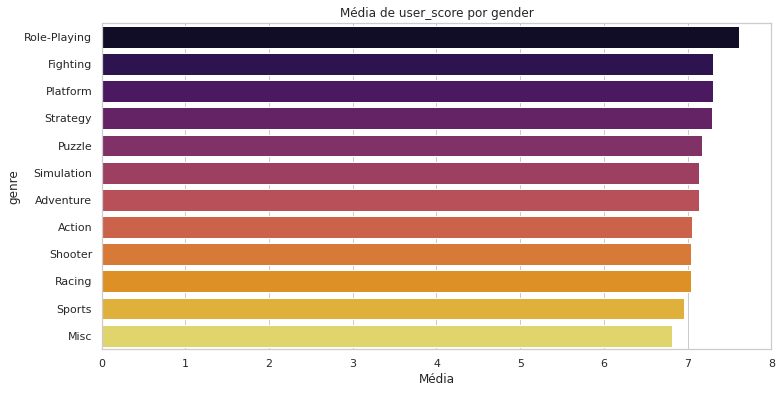

In [106]:
# plot do gráfico de barras
plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=grouped_us.values, y=grouped_us.index, orient='h', palette='inferno')
plt.xlabel('Média')
plt.title('Média de user_score por gender')
plt.show()

**Overview de user_score:**

- *muitos valores ausentes*
- *muitos valores a serem determinados ainda (`tdb`)*
- *criamos uma nova coluna com o intuito de utilizá-la como filtro mais adiante*
- *tratamos o formato da coluna*
- *plotamos um gráfico onde `Role-Playing`, `Fighting` e `Platform` receberam as melhores avaliações dos usuários*
- *gênero de `Strategy` e `Puzzle` surpreenderam aqui, pois sempre estavam mais abaixo nos gráficos anteriores*

### *Coluna rating*

In [107]:
# informações gerais 
df_games[['rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  9949 non-null   object
dtypes: object(1)
memory usage: 130.7+ KB


In [108]:
# mais informações
df_games.rating.describe()

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [109]:
# verificando os valores únicos
df_games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [110]:
# verificando os valores ausentes
df_games.rating.isna().sum()

6766

In [111]:
# visualizando
df_games.sample(15)

name platform  \
11191      Jikkyou Powerful Pro Yakyuu 2000 Ketteiban       PS   
10134                                    Pimp My Ride      Wii   
2879                      Power Rangers: Dino Thunder      PS2   
7954                       Major League Baseball 2K10      PS3   
3296                                         Tearaway      PSV   
12219                         Reader Rabbit 1st Grade      Wii   
6026                                         Starhawk      PS3   
14014          Da Capo I & II Plus Situation Portable      PSP   
7783                       101-in-1 Explosive Megamix       DS   
2791                     The Walking Dead: Season One     X360   
10067                                     Cold Winter      PS2   
12923             New Prince of Tennis: Go to the Top      3DS   
4421   The Urbz: Sims in the City (all regions sales)       DS   
15000                       Spy Hunter / Super Sprint      GBA   
5698              MonHun Nikki: Poka Poka Ailu Mura G      PSP   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
11191           2000.0        Sports      0.00      0.00      0.08   
10134           2008.0        Racing      0.10      0.00      0.00   
2879            2004.0        Action      0.35      0.27      0.00   
7954            2010.0        Sports      0.17      0.00      0.00   
3296            2013.0     Adventure      0.14      0.34      0.00   
12219           2010.0          Misc      0.06      0.00      0.00   
6026            2012.0        Action      0.18      0.05      0.03   
14014           2010.0     Adventure      0.00      0.00      0.04   
7783            2008.0        Puzzle      0.05      0.12      0.00   
2791            2012.0     Adventure      0.55      0.13      0.00   
10067           2005.0       Shooter      0.06      0.04      0.00   
12923           2015.0        Action      0.00      0.00      0.05   
4421            2004.0    Simulation      0.40      0.01      0.02   
15000           2005.0        Racing      0.02      0.01      0.00   
5698            2011.0  Role-Playing      0.00      0.00      0.31   

       other_sales  critic_score  user_score rating  total_sales  \
11191         0.01           0.0         NaN    NaN         0.09   
10134         0.01          26.0         3.8      T         0.11   
2879          0.09          49.0         6.2      E         0.71   
7954          0.01          74.0         5.3      E         0.18   
3296          0.14          87.0         8.9      E         0.62   
12219         0.00           0.0         NaN      E         0.06   
6026          0.03          77.0         7.8      T         0.29   
14014         0.00           0.0         NaN    NaN         0.04   
7783          0.02          46.0         NaN      E         0.19   
2791          0.05           0.0         NaN    NaN         0.73   
10067         0.01          73.0         8.2      M         0.11   
12923         0.00           0.0         NaN    NaN         0.05   
4421          0.00           0.0         NaN    NaN         0.43   
15000         0.00           0.0         NaN    NaN         0.03   
5698          0.00           0.0         NaN    NaN         0.31   

       received_score_from_users  
11191                          1  
10134                          1  
2879                           1  
7954                           1  
3296                           1  
12219                          1  
6026                           1  
14014                          1  
7783                           1  
2791                           1  
10067                          1  
12923                          1  
4421                           1  
15000                          1  
5698                           1

In [112]:
df_games

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           0.0         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           0.0         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           0.0         NaN   
16711      0.00      0.01      0.00         0.00           0.0         NaN   
16712      0.00      0.00      0.01         0.00           0.0         NaN   
16713      0.01      0.00      0.00         0.00           0.0         NaN   
16714      0.00      0.00      0.01         0.00           0.0         NaN   

      rating  total_sales  received_score_from_users  
0          E        82.54                          1  
1        NaN        40.24                          1  
2          E        35.52                          1  
3          E        32.77                          1  
4        NaN        31.38                          1  
...      ...          ...                        ...  
16710    NaN         0.01                          1  
16711    NaN         0.01                          1  
16712    NaN         0.01                          1  
16713    NaN         0.01                          1  
16714    NaN         0.01                          1  

[16715 rows x 13 columns]

*Após pesquisa na internet, identificamos o que cada sigla da coluna 'rating' quer informar e assim iremos alterar para os nomes completos das classificações, a fim de tornar mais claro e facilmente compreensível.*

In [113]:
# alterando as siglas da coluna rating
key = {'E': 'Everyone', 
       'M': 'Mature', 
       'T': 'Teen', 
       'E10+': 'Everyone 10 and Older', 
       'K-A': 'Kids to Adults', 
       'AO': 'Adults Only', 
       'EC': 'Early Childhood', 
       'RP': 'Rating Pending'}

# aplicando
df_games['rating'] = df_games['rating'].replace(key)

In [114]:
# preenchendo os valores ausentes para Rating Pending
df_games.rating = df_games.rating.fillna('Rating Pending')

In [115]:
# agrupando para plotar um gráfico
grouped_r = df_games.groupby('rating')['total_sales'].mean()
grouped_r = grouped_r.sort_values(ascending=False)

grouped_r

rating
Adults Only              1.960000
Kids to Adults           1.440000
Mature                   0.942924
Everyone                 0.610406
Teen                     0.504340
Everyone 10 and Older    0.461690
Rating Pending           0.420951
Early Childhood          0.218750
Name: total_sales, dtype: float64

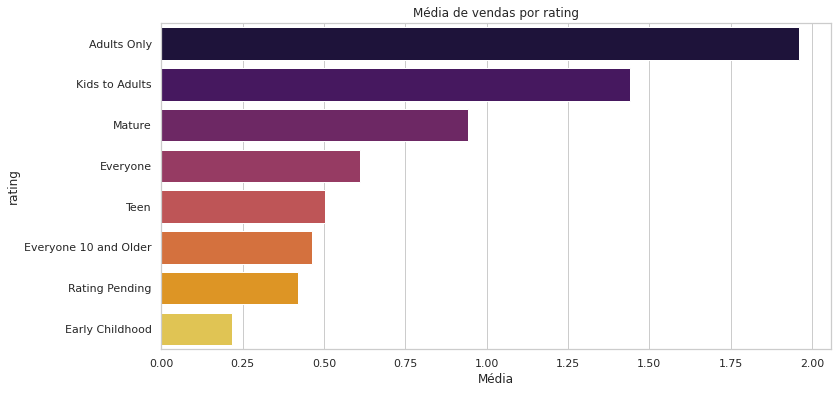

In [116]:
# plot do gráfico de barras
plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x=grouped_r.values, y=grouped_r.index, orient='h', palette='inferno')
plt.xlabel('Média')
plt.title('Média de vendas por rating')
plt.show()

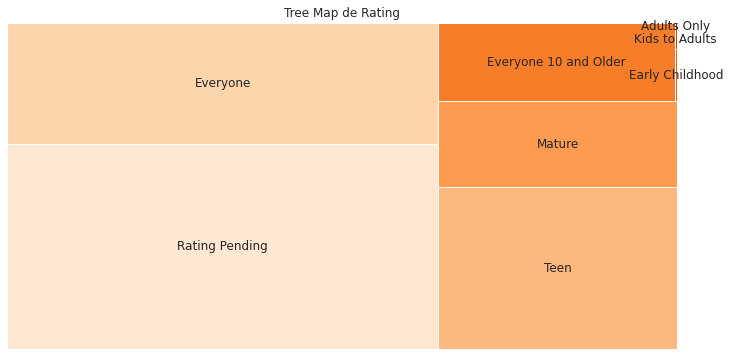

In [118]:
# gerando um tree map
rating_counts = df_games['rating'].value_counts()

colors = sns.color_palette('Oranges', len(rating_counts))

plt.figure(figsize=(12, 6))
squarify.plot(sizes=rating_counts, label=rating_counts.index, color= colors, alpha=1)
plt.axis('off')
plt.title('Tree Map de Rating')
plt.show()

**Overview da coluna rating:**

- *novamente muitos valores ausentes, alteramos para rating pending*
- *substituímos as siglas por informações mais completas*
- *criamos um gráfico de barras, nuvem de palavras*
- *jogos com classificação para somente adultos vende muito mais*
- *criamos um tree map para visualizar melhor a coluna, classificação de `Everyone` e `Rating Pending` são os mais relevantes, `Adult Only`, `Kids to Adults` e `Early Childhood` são os menos significativos*

# *Exploração dos dados*

In [119]:
# informações gerais após limpeza e tratamento
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       16715 non-null  object 
 1   platform                   16715 non-null  object 
 2   year_of_release            16715 non-null  float64
 3   genre                      16715 non-null  object 
 4   na_sales                   16715 non-null  float64
 5   eu_sales                   16715 non-null  float64
 6   jp_sales                   16715 non-null  float64
 7   other_sales                16715 non-null  float64
 8   critic_score               16715 non-null  float64
 9   user_score                 7590 non-null   float64
 10  rating                     16715 non-null  object 
 11  total_sales                16715 non-null  float64
 12  received_score_from_users  16715 non-null  int64  
dtypes: float64(8), int64(1), object(4)
memory usag

In [120]:
# mais informações
df_games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16715.000000  16715.000000  16715.000000  16715.000000   
mean       2006.491535      0.263377      0.145060      0.077617   
std           5.830785      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score   user_score   total_sales  \
count  16715.000000  16715.000000  7590.000000  16715.000000   
mean       0.047342     33.574035     7.125046      0.533396   
std        0.186731     35.818235     1.500006      1.548261   
min        0.000000      0.000000     0.000000      0.000000   
25%        0.000000      0.000000     6.400000      0.060000   
50%        0.010000      0.000000     7.500000      0.170000   
75%        0.030000     70.000000     8.200000      0.470000   
max       10.570000     98.000000     9.700000     82.540000   

       received_score_from_users  
count                    16715.0  
mean                         1.0  
std                          0.0  
min                          1.0  
25%                          1.0  
50%                          1.0  
75%                          1.0  
max                          1.0

## *Verificando a quantidade de jogos lançados por ano*

In [121]:
# agrupando informações
grouped_yor = df_games.groupby('year_of_release')['name'].count()

grouped_yor

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     830
2003.0     780
2004.0     764
2005.0     941
2006.0    1008
2007.0    1449
2008.0    1429
2009.0    1427
2010.0    1255
2011.0    1137
2012.0     653
2013.0     545
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

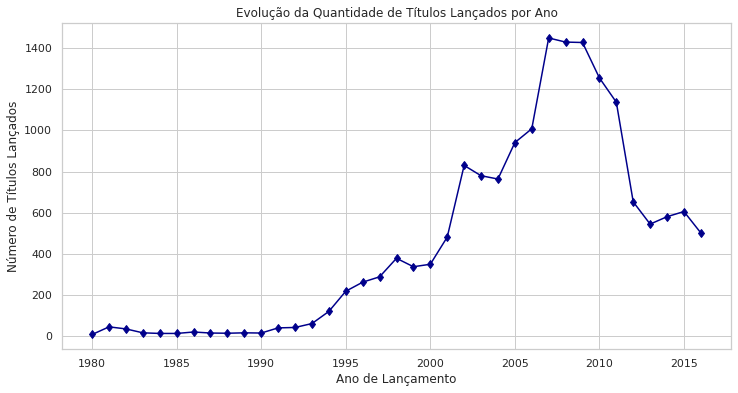

In [122]:
# plot do gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(grouped_yor.index, grouped_yor.values, marker='d', linestyle='-', color='darkblue')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos Lançados')
plt.title('Evolução da Quantidade de Títulos Lançados por Ano')
plt.grid(True)
plt.show()

*Constatamos que até 2016, houve uma evolução notável no número de títulos de jogos lançados a cada ano, com um aumento constante desde a década de 1980, atingindo seu pico em 2010, seguido por uma queda subsequente.*

## *Verificando a variação das vendas totais*

### *Vendas por plataforma*

In [123]:
# informações sobre vendas por plataforma
sales_per_platform = df_games.groupby('platform')['total_sales'].sum().reset_index()
sales_per_platform = sales_per_platform.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
sales_per_platform = sales_per_platform.head(20)

sales_per_platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   platform     20 non-null     object 
 1   total_sales  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


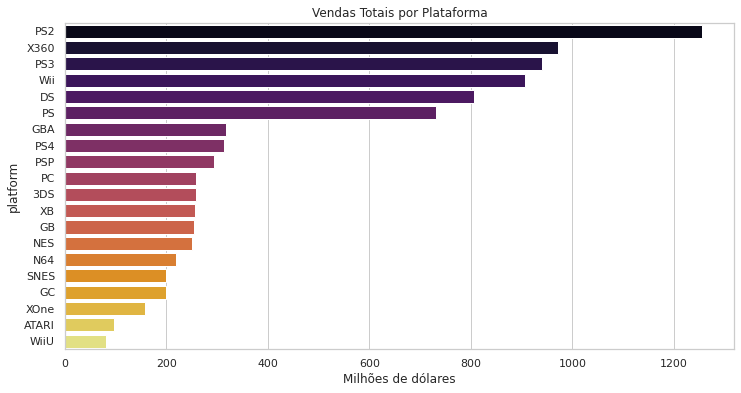

In [124]:
# plot do gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_per_platform['total_sales'], y=sales_per_platform['platform'], palette='inferno')
plt.title('Vendas Totais por Plataforma')
plt.xlabel('Milhões de dólares')
plt.show()

**Overview:**

- *`PS2` foi a plataforma que mais vendeu jogos*
- *temos 6 plataformas qua alcançaram mais de 600 milhões em vendas*
- *as demais plataformas ficaram abaixo de 400 milhões*

### *Vendas por plataforma ao longo dos anos*

*Selecionando top 6 plataformas*

In [125]:
# filtrando e armazenando em top_six_df_games
top_six_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top_six_df_games = df_games[df_games['platform'].isin(top_six_platforms)]
top_six_df_games = top_six_df_games[['platform', 'year_of_release', 'total_sales']]

top_six_df_games

platform  year_of_release  total_sales
0          Wii           2006.0        82.54
2          Wii           2008.0        35.52
3          Wii           2009.0        32.77
6           DS           2006.0        29.80
7          Wii           2006.0        28.91
...        ...              ...          ...
16700       DS           2009.0         0.01
16704       DS           2008.0         0.01
16709      PS2           2008.0         0.00
16710      PS3           2016.0         0.01
16711     X360           2006.0         0.01

[9422 rows x 3 columns]

In [126]:
# filtrando e organizando por plataforma
ps2 = top_six_df_games.loc[top_six_df_games['platform'].isin(['PS2'])]
ps2 = ps2.groupby('year_of_release')['total_sales'].sum().reset_index()
ps2 = ps2.sort_values(by='year_of_release', ascending=False)

ps3 = top_six_df_games.loc[top_six_df_games['platform'].isin(['PS3'])]
ps3 = ps3.groupby('year_of_release')['total_sales'].sum().reset_index()
ps3 = ps3.sort_values(by='year_of_release', ascending=False)

ps = top_six_df_games.loc[top_six_df_games['platform'].isin(['PS'])]
ps = ps.groupby('year_of_release')['total_sales'].sum().reset_index()
ps = ps.sort_values(by='year_of_release', ascending=False)

In [127]:
# filtrando e organizando por plataforma
x360 = top_six_df_games.loc[top_six_df_games['platform'].isin(['X360'])]
x360 = x360.groupby('year_of_release')['total_sales'].sum().reset_index()
x360 = x360.sort_values(by='year_of_release', ascending=False)

wii = top_six_df_games.loc[top_six_df_games['platform'].isin(['Wii'])]
wii = wii.groupby('year_of_release')['total_sales'].sum().reset_index()
wii = wii.sort_values(by='year_of_release', ascending=False)

ds = top_six_df_games.loc[top_six_df_games['platform'].isin(['DS'])]
ds = ds.groupby('year_of_release')['total_sales'].sum().reset_index()
ds = ds.sort_values(by='year_of_release', ascending=False)

In [128]:
x360 = top_six_df_games.loc[top_six_df_games['platform'].isin(['X360'])]
x360 = x360.groupby('year_of_release')['total_sales'].sum().reset_index()
x360 = x360.sort_values(by='year_of_release', ascending=False)

wii = top_six_df_games.loc[top_six_df_games['platform'].isin(['Wii'])]
wii = wii.groupby('year_of_release')['total_sales'].sum().reset_index()
wii = wii.sort_values(by='year_of_release', ascending=False)

ds = top_six_df_games.loc[top_six_df_games['platform'].isin(['DS'])]
ds = ds.groupby('year_of_release')['total_sales'].sum().reset_index()
ds = ds.sort_values(by='year_of_release', ascending=False)

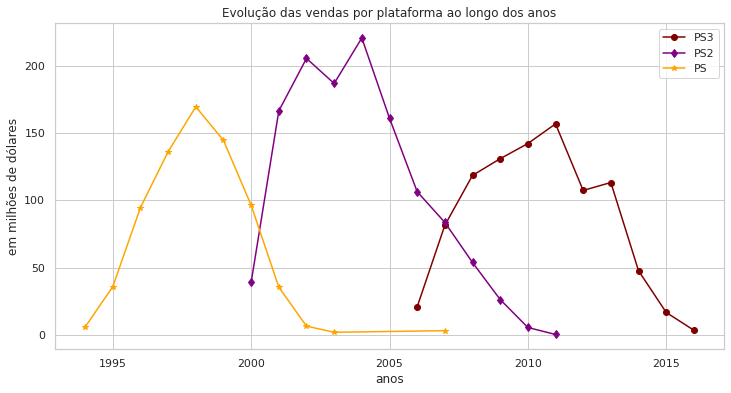

In [129]:
# plot plataformas PS, PS2 e PS3 (gráfico de linhas)
plt.figure(figsize=(12, 6))
plt.plot(ps3.year_of_release, ps3.total_sales, marker='o', linestyle='-', label='PS3', color='maroon')
plt.plot(ps2.year_of_release, ps2.total_sales, marker='d', linestyle='-', label='PS2', color='purple')
plt.plot(ps.year_of_release, ps.total_sales, marker='*', linestyle='-', label='PS', color='orange')

plt.legend()
plt.xlabel('anos')
plt.ylabel('em milhões de dólares')
plt.title('Evolução das vendas por plataforma ao longo dos anos')
plt.grid(True)
plt.show()

*Observamos que as três plataformas que plotamos acima, todas pertencentes à mesma empresa, a SONY, seguem um padrão de ciclo de vida de aproximadamente 10 anos. Essas plataformas atingem o pico de vendas com jogos, geralmente por volta da metade desse período, ou seja, em torno do quinto ano após o seu lançamento.*

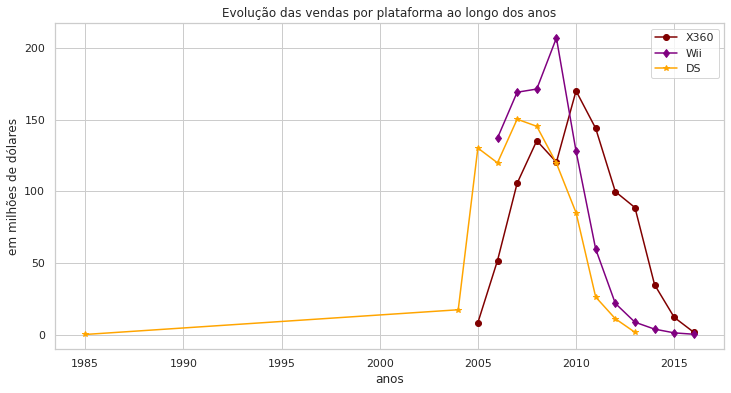

In [130]:
# plot plataformas X360, Wii e DS (gráfico de linhas)
plt.figure(figsize=(12, 6))
plt.plot(x360.year_of_release, x360.total_sales, marker='o', linestyle='-', label="X360", color='maroon')
plt.plot(wii.year_of_release, wii.total_sales, marker='d', linestyle='-', label="Wii", color='purple')
plt.plot(ds.year_of_release, ds.total_sales, marker='*', linestyle='-', label="DS", color='orange')

plt.legend()
plt.xlabel('anos')
plt.ylabel('em milhões de dólares')
plt.title('Evolução das vendas por plataforma ao longo dos anos')
plt.grid(True)
plt.show()

*Identificamos aqui um possível outlier, no ano de 1985. Vamos olhar mais de perto.*

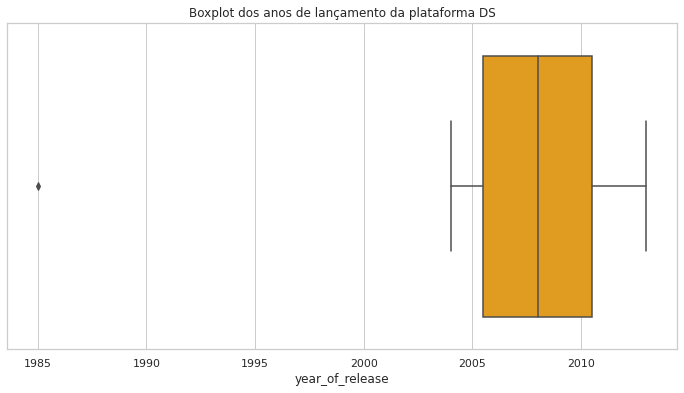

In [131]:
# plot do gráfico de caixa
plt.figure(figsize=(12, 6))
sns.boxplot(data=ds, x='year_of_release', color='orange')
plt.title("Boxplot dos anos de lançamento da plataforma DS")
plt.show()

*Após buscar informações no Google sobre a plataforma `DS Nintendo`, ela não exisita em 1985, então consideraremos como erro de input.*

In [132]:
# identificando e removendo
outlier = (df_games['year_of_release'] == 1985) & (df_games['platform'] == 'DS')
top_six_df = top_six_df_games.drop(top_six_df_games[outlier].index)
ds_out = top_six_df_games.loc[top_six_df_games['platform'].isin(['DS'])]
ds_out = ds_out.groupby('year_of_release')['total_sales'].sum().reset_index()
ds_out = ds_out.sort_values(by='year_of_release', ascending=False)

/tmp/ipykernel_298/1566692399.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_six_df = top_six_df_games.drop(top_six_df_games[outlier].index)


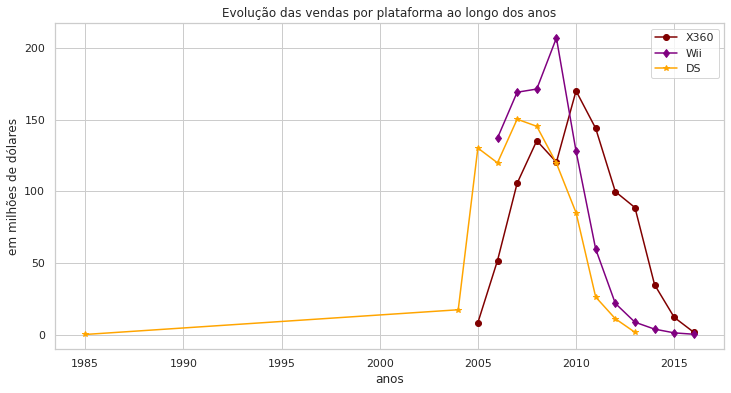

In [133]:
# plot do gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(x360.year_of_release, x360.total_sales, marker='o', linestyle='-', label="X360", color='maroon')
plt.plot(wii.year_of_release, wii.total_sales, marker='d', linestyle='-', label="Wii", color='purple')
plt.plot(ds_out.year_of_release, ds.total_sales, marker='*', linestyle='-', label="DS", color='orange')

plt.legend()
plt.xlabel('anos')
plt.ylabel('em milhões de dólares')
plt.title('Evolução das vendas por plataforma ao longo dos anos')
plt.grid(True)
plt.show()

*Através do gráfico acima, conseguimos verificar que as plataformas `X360`, `Wii` e `DS` também apresentam um ciclo de vendas dos games, próximo de 10 anos e pico em 5 anos.*

# *Definindo período de tempo*

*Com base na compreensão de que o ciclo de vida máximo é de 10 anos e a meia-vida é de 5 anos, definiremos a nossa janela temporal de 5 anos para trás de 2016.*

In [134]:
# fazendo uma cópia
df_games_5y = df_games.copy()

In [135]:
# filtrando df_games_5y
start = 2011
end = 2016
df_games_5y = df_games_5y.loc[(df_games_5y['year_of_release'] >= start) & (df_games_5y['year_of_release'] <= end)]

df_games_5y

name platform  year_of_release         genre  \
16                 Grand Theft Auto V      PS3           2013.0        Action   
23                 Grand Theft Auto V     X360           2013.0        Action   
29     Call of Duty: Modern Warfare 3     X360           2011.0       Shooter   
31          Call of Duty: Black Ops 3      PS4           2015.0       Shooter   
33                Pokemon X/Pokemon Y      3DS           2013.0  Role-Playing   
...                               ...      ...              ...           ...   
16703                Strawberry Nauts      PSV           2016.0     Adventure   
16707                Aiyoku no Eustia      PSV           2014.0          Misc   
16710   Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16712         Haitaka no Psychedelica      PSV           2016.0     Adventure   
16714             Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16         7.02      9.09      0.98         3.96          97.0         8.2   
23         9.66      5.14      0.06         1.41          97.0         8.1   
29         9.04      4.24      0.13         1.32          88.0         3.4   
31         6.03      5.86      0.36         2.38           0.0         NaN   
33         5.28      4.19      4.35         0.78           0.0         NaN   
...         ...       ...       ...          ...           ...         ...   
16703      0.00      0.00      0.01         0.00           0.0         NaN   
16707      0.00      0.00      0.01         0.00           0.0         NaN   
16710      0.00      0.00      0.01         0.00           0.0         NaN   
16712      0.00      0.00      0.01         0.00           0.0         NaN   
16714      0.00      0.00      0.01         0.00           0.0         NaN   

               rating  total_sales  received_score_from_users  
16             Mature        21.05                          1  
23             Mature        16.27                          1  
29             Mature        14.73                          1  
31     Rating Pending        14.63                          1  
33     Rating Pending        14.60                          1  
...               ...          ...                        ...  
16703  Rating Pending         0.01                          1  
16707  Rating Pending         0.01                          1  
16710  Rating Pending         0.01                          1  
16712  Rating Pending         0.01                          1  
16714  Rating Pending         0.01                          1  

[4024 rows x 13 columns]

# *Plataformas líderes de vendas*

In [136]:
df_games_5y_grouped_p_ts = df_games_5y.groupby('platform')['total_sales'].sum()
df_games_5y_grouped_p_ts = df_games_5y_grouped_p_ts.sort_values(ascending=False).reset_index()

df_games_5y_grouped_p_ts

platform  total_sales
0       PS3       445.57
1      X360       380.43
2       PS4       314.14
3       3DS       257.81
4      XOne       159.32
5        PC        98.03
6       Wii        95.02
7      WiiU        82.19
8       PSV        53.81
9        DS        38.73
10      PSP        29.01
11      PS2         0.45

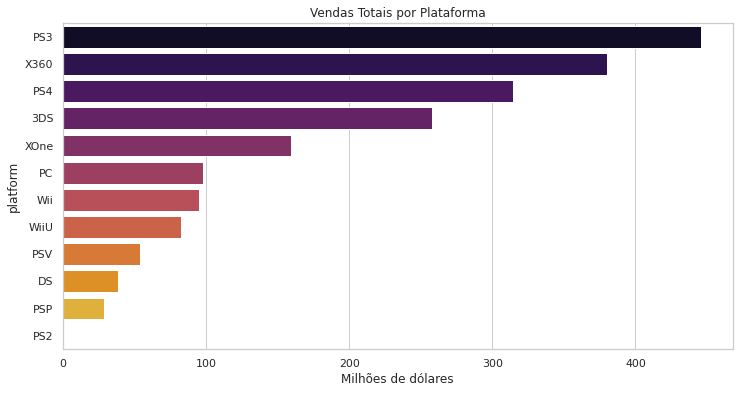

In [137]:
# plot do gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='platform', data=df_games_5y_grouped_p_ts, palette='inferno')
plt.title('Vendas Totais por Plataforma')
plt.xlabel('Milhões de dólares')
plt.show()

*Somente com este gráfico aqui já podemos eliminar a plataforma `PS2` dos nossos estudos de plataformas rentáveis para lançamento de jogos.*

*Identificamos aqui também que as plataformas líderes de vendas (`PS3`, `X360` e `PS4`) passaram de 300 milhões de dólares.* 

In [138]:
# removendo 
df_games_5y = df_games_5y.query("platform != 'PS2'")

# contando valores únicos
df_games_5y.platform.unique()
len(df_games_5y.platform.unique())

11

# *Analisando plataformas potencialmente lucrativas*

In [139]:
# agrupando
df_games_5y_grouped_p_yor = df_games_5y.groupby(['platform', 'year_of_release'])['total_sales'].sum()
df_games_5y_grouped_p_yor = df_games_5y_grouped_p_yor.reset_index()

df_games_5y_grouped_p_yor

platform  year_of_release  total_sales
0       3DS           2011.0        63.20
1       3DS           2012.0        51.36
2       3DS           2013.0        56.57
3       3DS           2014.0        43.76
4       3DS           2015.0        27.78
5       3DS           2016.0        15.14
6        DS           2011.0        26.18
7        DS           2012.0        11.01
8        DS           2013.0         1.54
9        PC           2011.0        35.03
10       PC           2012.0        23.22
11       PC           2013.0        12.73
12       PC           2014.0        13.28
13       PC           2015.0         8.52
14       PC           2016.0         5.25
15      PS3           2011.0       156.78
16      PS3           2012.0       107.36
17      PS3           2013.0       113.25
18      PS3           2014.0        47.76
19      PS3           2015.0        16.82
20      PS3           2016.0         3.60
21      PS4           2013.0        25.99
22      PS4           2014.0       100.00
23      PS4           2015.0       118.90
24      PS4           2016.0        69.25
25      PSP           2011.0        17.82
26      PSP           2012.0         7.69
27      PSP           2013.0         3.14
28      PSP           2014.0         0.24
29      PSP           2015.0         0.12
30      PSV           2011.0         4.63
31      PSV           2012.0        16.19
32      PSV           2013.0        10.59
33      PSV           2014.0        11.90
34      PSV           2015.0         6.25
35      PSV           2016.0         4.25
36      Wii           2011.0        59.65
37      Wii           2012.0        21.71
38      Wii           2013.0         8.59
39      Wii           2014.0         3.75
40      Wii           2015.0         1.14
41      Wii           2016.0         0.18
42     WiiU           2012.0        17.56
43     WiiU           2013.0        21.65
44     WiiU           2014.0        22.03
45     WiiU           2015.0        16.35
46     WiiU           2016.0         4.60
47     X360           2011.0       143.89
48     X360           2012.0        99.74
49     X360           2013.0        88.58
50     X360           2014.0        34.74
51     X360           2015.0        11.96
52     X360           2016.0         1.52
53     XOne           2013.0        18.96
54     XOne           2014.0        54.07
55     XOne           2015.0        60.14
56     XOne           2016.0        26.15

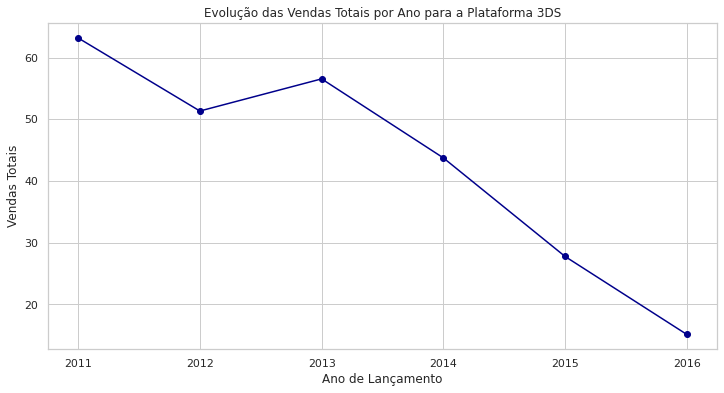

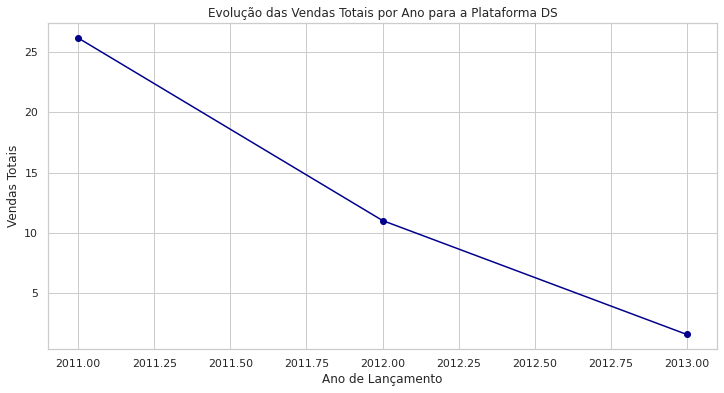

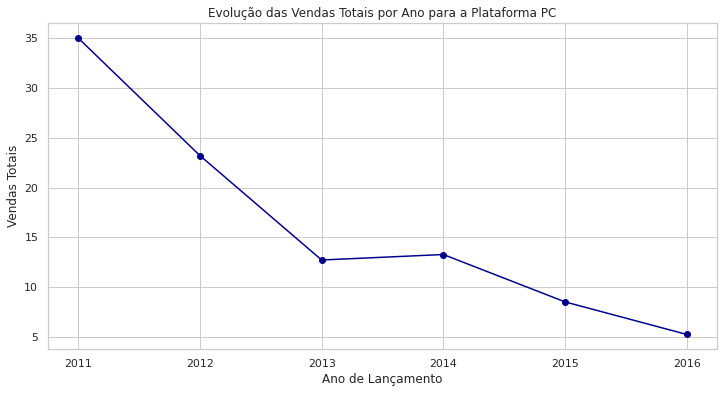

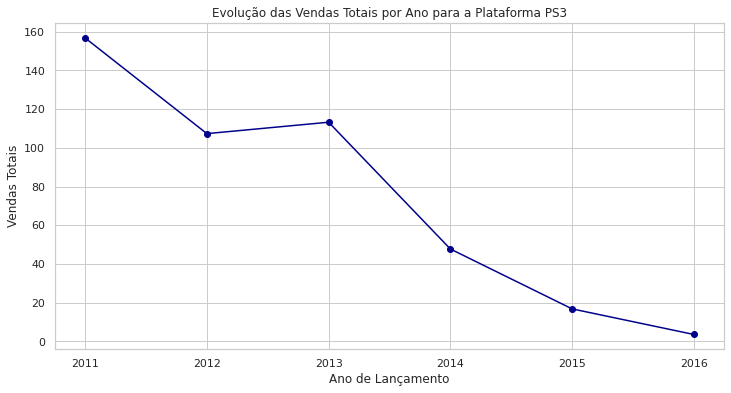

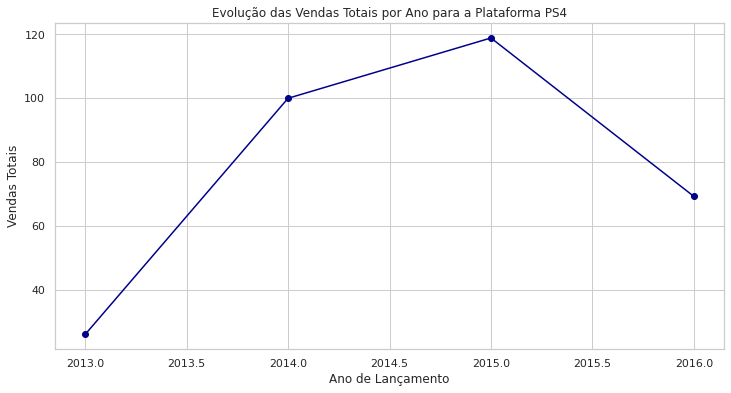

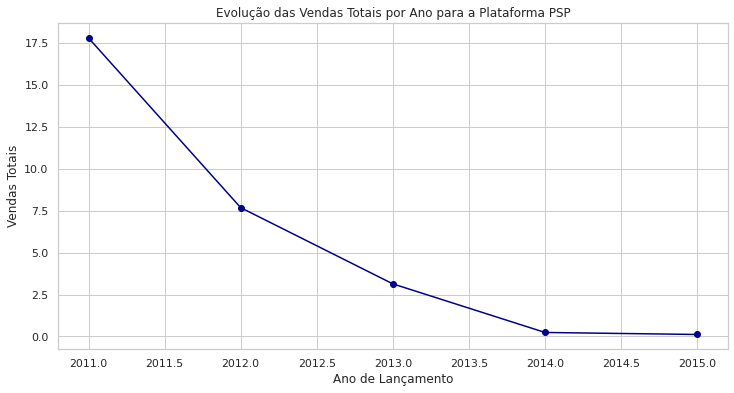

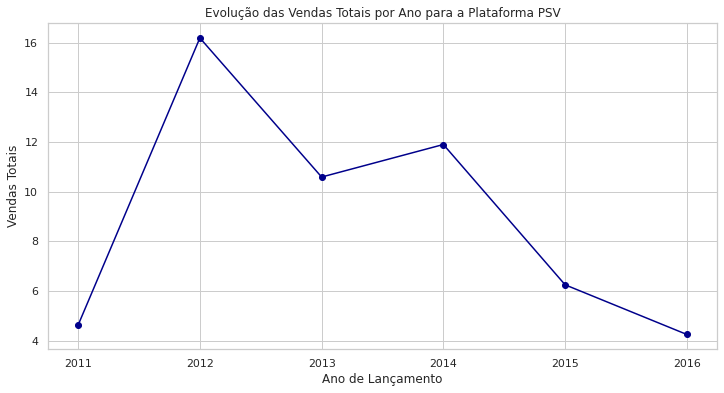

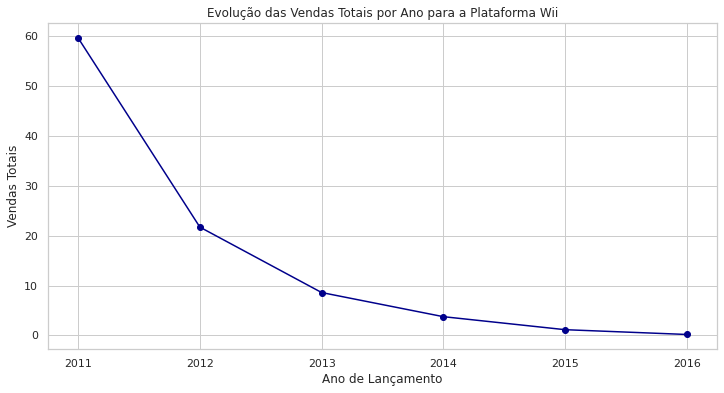

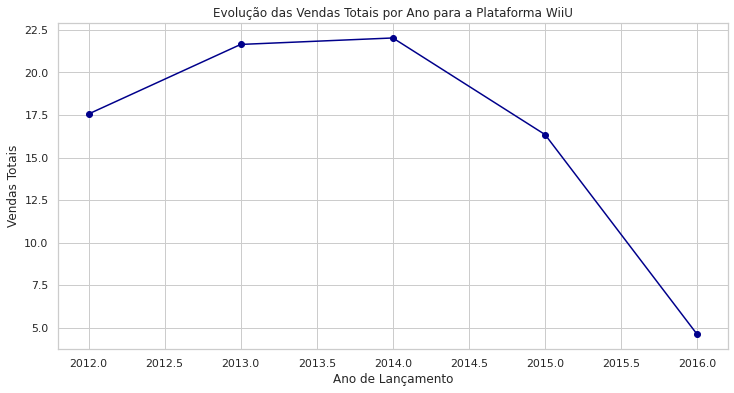

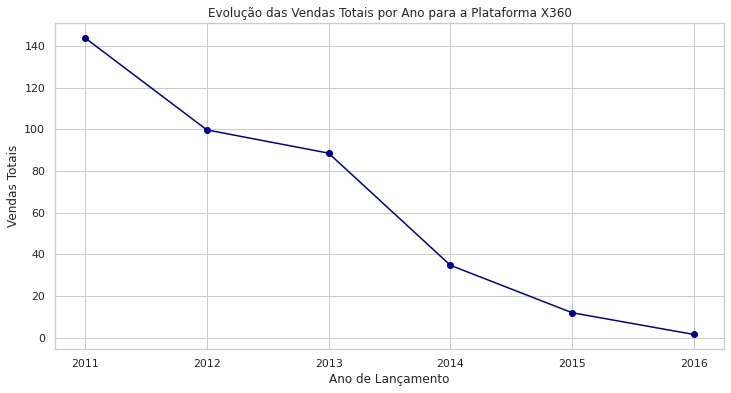

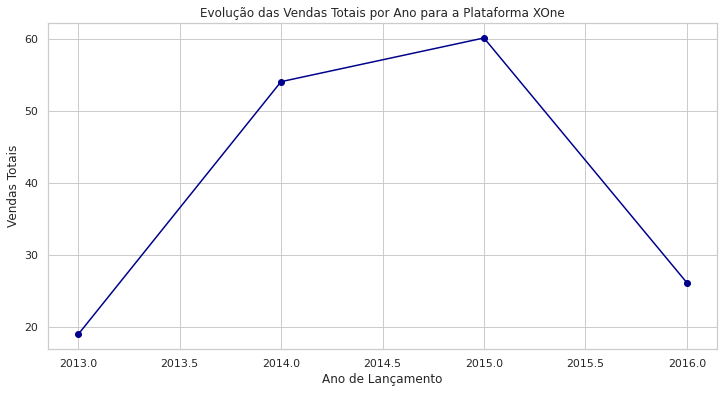

In [140]:
# plot do gráfico de linhas
platforms = df_games_5y_grouped_p_yor['platform'].unique()

for platform in platforms:
    platform_data = df_games_5y_grouped_p_yor[df_games_5y_grouped_p_yor['platform'] == platform]
    plt.figure(figsize=(12, 6))
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', linestyle='-', color='darkblue')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Vendas Totais')
    plt.title(f'Evolução das Vendas Totais por Ano para a Plataforma {platform}')
    plt.grid(True)
    plt.show()

*Com base nos gráficos acima, é evidente que as plataformas `PS4` e `XOne` ainda têm um potencial significativo de lucratividade. No entanto, é importante notar que outras duas opções a serem consideradas, embora com ressalvas, são as plataformas `PC` e `PSV`. A tomada de decisão deve ser feita com extrema cautela, levando em consideração o ciclo de vida que deve estar chegando ao seu final.*

# *Diagramas de caixa para as vendas globais dos jogos, divididos por plataforma.*

In [141]:
# nosso dataframe
df_games_5y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       4017 non-null   object 
 1   platform                   4017 non-null   object 
 2   year_of_release            4017 non-null   float64
 3   genre                      4017 non-null   object 
 4   na_sales                   4017 non-null   float64
 5   eu_sales                   4017 non-null   float64
 6   jp_sales                   4017 non-null   float64
 7   other_sales                4017 non-null   float64
 8   critic_score               4017 non-null   float64
 9   user_score                 2031 non-null   float64
 10  rating                     4017 non-null   object 
 11  total_sales                4017 non-null   float64
 12  received_score_from_users  4017 non-null   int64  
dtypes: float64(8), int64(1), object(4)
memory usag

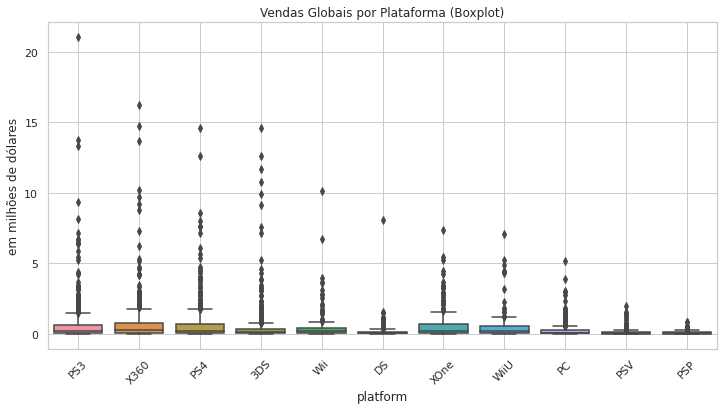

In [142]:
# plot dos boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_games_5y)
plt.title('Vendas Globais por Plataforma (Boxplot)')
plt.ylabel('em milhões de dólares')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

*Temos alguns valores únicos em cada plataforma que estão dificultando a boa visualização dos boxplots. Iremos filtrá-los.*

In [143]:
# definindo limites superiores para uma melhor visualização com tukey
def tukey_method(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    return upper_limit

In [144]:
# aplicando e filtrando
upper_limits = df_games_5y.groupby('platform')['total_sales'].apply(tukey_method)
df_games_5y_filtered = df_games_5y[df_games_5y.apply(lambda row: row['total_sales'] <= upper_limits[row['platform']], axis=1)]

df_games_5y_filtered

name platform  year_of_release       genre  \
1022                Kinect Star Wars     X360           2012.0      Action   
1026                 The Order: 1886      PS4           2015.0     Shooter   
1028                           Knack      PS4           2013.0    Platform   
1033              Hitman: Absolution     X360           2012.0      Action   
1035                        The Crew      PS4           2014.0      Racing   
...                              ...      ...              ...         ...   
16703               Strawberry Nauts      PSV           2016.0   Adventure   
16707               Aiyoku no Eustia      PSV           2014.0        Misc   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1022       1.05      0.52      0.03         0.14          55.0         3.5   
1026       0.61      0.78      0.06         0.27          63.0         6.6   
1028       0.43      0.68      0.42         0.20          54.0         6.5   
1033       0.68      0.88      0.01         0.17          79.0         7.1   
1035       0.35      1.08      0.03         0.26          61.0         5.4   
...         ...       ...       ...          ...           ...         ...   
16703      0.00      0.00      0.01         0.00           0.0         NaN   
16707      0.00      0.00      0.01         0.00           0.0         NaN   
16710      0.00      0.00      0.01         0.00           0.0         NaN   
16712      0.00      0.00      0.01         0.00           0.0         NaN   
16714      0.00      0.00      0.01         0.00           0.0         NaN   

                      rating  total_sales  received_score_from_users  
1022                    Teen         1.74                          1  
1026                  Mature         1.72                          1  
1028   Everyone 10 and Older         1.73                          1  
1033                  Mature         1.74                          1  
1035                    Teen         1.72                          1  
...                      ...          ...                        ...  
16703         Rating Pending         0.01                          1  
16707         Rating Pending         0.01                          1  
16710         Rating Pending         0.01                          1  
16712         Rating Pending         0.01                          1  
16714         Rating Pending         0.01                          1  

[3584 rows x 13 columns]

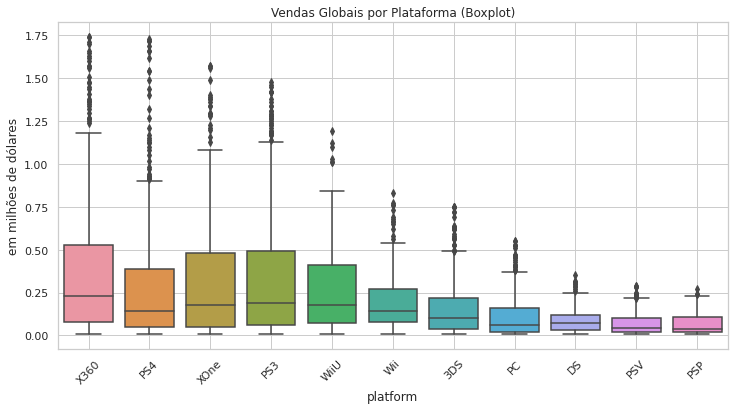

In [145]:
# plot do boxplots novamente
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_games_5y_filtered)
plt.title('Vendas Globais por Plataforma (Boxplot)')
plt.ylabel('em milhões de dólares')
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.grid(True)
plt.show()

In [146]:
# verificando médias e outras métricas
platforms_metrics = df_games_5y_filtered.groupby('platform')['total_sales'].agg(['mean','median', 'max', 'sum', 'std', 'var'])
platforms_metrics.sort_values(by='mean', ascending=False)

mean  median   max     sum       std       var
platform                                                    
X360      0.384956   0.230  1.74  174.00  0.414871  0.172118
XOne      0.343227   0.175  1.57   75.51  0.403082  0.162475
PS3       0.325487   0.190  1.48  210.59  0.353406  0.124896
PS4       0.306213   0.140  1.73  103.50  0.384944  0.148182
WiiU      0.279624   0.180  1.19   37.19  0.280285  0.078560
Wii       0.200581   0.140  0.83   34.50  0.186399  0.034745
3DS       0.162321   0.100  0.75   72.72  0.166146  0.027604
PC        0.113538   0.060  0.55   38.83  0.123341  0.015213
DS        0.091411   0.070  0.35   14.90  0.078763  0.006204
PSV       0.068429   0.045  0.29   26.14  0.062822  0.003947
PSP       0.065784   0.040  0.27   18.88  0.060198  0.003624

**Overview:**

- *`X360` tem a maior média, seguido de `XOne` e `PS3`*
- *`X360` também tem a maior mediana*
- *`X360` ficou com valor máximo, seguido de `PS4` nos dados filtrados*
- *`X360` e `XOne` possum desvio padrão e variância maiores das demais plataformas*

# *O impacto das avaliações de usuários e profissionais nas vendas*

In [147]:
# nosso dataframe
df_games_5y_filtered.info()
df_games_5y_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 1022 to 16714
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3584 non-null   object 
 1   platform                   3584 non-null   object 
 2   year_of_release            3584 non-null   float64
 3   genre                      3584 non-null   object 
 4   na_sales                   3584 non-null   float64
 5   eu_sales                   3584 non-null   float64
 6   jp_sales                   3584 non-null   float64
 7   other_sales                3584 non-null   float64
 8   critic_score               3584 non-null   float64
 9   user_score                 1700 non-null   float64
 10  rating                     3584 non-null   object 
 11  total_sales                3584 non-null   float64
 12  received_score_from_users  3584 non-null   int64  
dtypes: float64(8), int64(1), object(4)
memory us

year_of_release    na_sales     eu_sales     jp_sales  other_sales  \
count      3584.000000  3584.00000  3584.000000  3584.000000  3584.000000   
mean       2013.139509     0.09596     0.071200     0.035530     0.022411   
std           1.799172     0.16721     0.122977     0.073379     0.039030   
min        2011.000000     0.00000     0.000000     0.000000     0.000000   
25%        2011.000000     0.00000     0.000000     0.000000     0.000000   
50%        2013.000000     0.02000     0.020000     0.000000     0.010000   
75%        2015.000000     0.11000     0.090000     0.040000     0.030000   
max        2016.000000     1.35000     1.080000     0.860000     0.270000   

       critic_score   user_score  total_sales  received_score_from_users  
count   3584.000000  1700.000000   3584.00000                     3584.0  
mean      29.115234     6.583294      0.22510                        1.0  
std       35.279204     1.532678      0.30379                        0.0  
min        0.000000     0.200000      0.01000                        1.0  
25%        0.000000     5.800000      0.04000                        1.0  
50%        0.000000     6.900000      0.10000                        1.0  
75%       69.000000     7.700000      0.27000                        1.0  
max       95.000000     9.300000      1.74000                        1.0

In [148]:
# verificando os valores únicos das colunas...
df_games_5y_filtered.critic_score.unique()

array([55., 63., 54., 79., 61., 88.,  0., 71., 81., 89., 86., 83., 78.,
       80., 90., 85., 75., 70., 94., 74., 93., 87., 60., 77., 68., 76.,
       84., 91., 72., 69., 73., 82., 64., 52., 53., 62., 66., 39., 57.,
       67., 49., 48., 51., 95., 43., 65., 92., 50., 32., 56., 58., 59.,
       34., 47., 46., 44., 33., 31., 45., 41., 40., 42., 36., 23., 38.,
       35., 26., 24., 37., 21., 19., 20., 25., 13.])

In [149]:
# verificando os valores únicos das colunas...
df_games_5y_filtered.user_score.unique()

array([3.5, 6.6, 6.5, 7.1, 5.4, 7.9, nan, 4.5, 8.2, 7.2, 8.8, 3. , 7.8,
       7.7, 6.7, 6.8, 5.8, 2.9, 6.4, 8.5, 8.1, 8.6, 6. , 2.7, 5.5, 8.4,
       6.1, 7.3, 8. , 8.3, 5.9, 6.2, 7.5, 6.9, 5.7, 9.2, 6.3, 4.9, 5. ,
       7.4, 5.1, 5.2, 7.6, 8.7, 5.6, 7. , 5.3, 4.3, 4.1, 3.2, 4.8, 3.4,
       8.9, 4.4, 1.8, 3.1, 3.8, 4.6, 3.3, 1.6, 4. , 3.6, 3.7, 2.4, 2.8,
       4.7, 9. , 1.7, 4.2, 2.1, 3.9, 2. , 1.5, 0.7, 2.5, 2.2, 0.2, 1.2,
       9.3, 0.9, 1.9, 1.3, 1. , 1.4, 2.3])

In [150]:
# transformando para a mesma escala de critic_score
df_games_5y_filtered.user_score = df_games_5y_filtered.user_score * 10
df_games_5y_filtered.user_score.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1022    35.0
1026    66.0
1028    65.0
1033    71.0
1035    54.0
Name: user_score, dtype: float64

*Vamos selecionar as plataformas `PS4` e `XOne` para as nossas análises*

In [151]:
# filtrando
df_games_ps4 = df_games_5y_filtered[(df_games_5y_filtered['platform'] == 'PS4') & 
                                    (df_games_5y_filtered['user_score'] != 0) & 
                                    (df_games_5y_filtered['critic_score'] != 0)]

df_games_xone = df_games_5y_filtered[(df_games_5y_filtered['platform'] == 'XOne') & 
                                     (df_games_5y_filtered['user_score'] != 0) & 
                                     (df_games_5y_filtered['critic_score'] != 0)]


In [152]:

df_games_xone

name platform  year_of_release  \
1176                       Dead Rising 3     XOne           2013.0   
1180                          Watch Dogs     XOne           2014.0   
1183                       Madden NFL 15     XOne           2014.0   
1274               Batman: Arkham Knight     XOne           2015.0   
1386                     Forza Horizon 2     XOne           2014.0   
...                                  ...      ...              ...   
16322  Agatha Christie's The ABC Murders     XOne           2016.0   
16392                     Goat Simulator     XOne           2016.0   
16597        Saints Row: Gat out of Hell     XOne           2015.0   
16630           Sébastien Loeb Rally Evo     XOne           2016.0   
16660                   Prison Architect     XOne           2016.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
1176       Action      1.06      0.35      0.01         0.15          78.0   
1180       Action      0.90      0.53      0.00         0.14          78.0   
1183       Sports      1.31      0.09      0.00         0.16          80.0   
1274       Action      0.88      0.47      0.00         0.14          85.0   
1386       Racing      0.50      0.78      0.01         0.11          86.0   
...           ...       ...       ...       ...          ...           ...   
16322   Adventure      0.01      0.00      0.00         0.00          66.0   
16392  Simulation      0.00      0.01      0.00         0.00          53.0   
16597      Action      0.00      0.01      0.00         0.00          65.0   
16630      Racing      0.00      0.01      0.00         0.00          63.0   
16660      Action      0.01      0.00      0.00         0.00          74.0   

       user_score                 rating  total_sales  \
1176         68.0                 Mature         1.57   
1180         58.0                 Mature         1.57   
1183         64.0               Everyone         1.56   
1274         66.0                 Mature         1.49   
1386         82.0  Everyone 10 and Older         1.40   
...           ...                    ...          ...   
16322        75.0         Rating Pending         0.01   
16392        63.0                   Teen         0.01   
16597        60.0                 Mature         0.01   
16630        82.0               Everyone         0.01   
16660        67.0         Rating Pending         0.01   

       received_score_from_users  
1176                           1  
1180                           1  
1183                           1  
1274                           1  
1386                           1  
...                          ...  
16322                          1  
16392                          1  
16597                          1  
16630                          1  
16660                          1  

[146 rows x 13 columns]

### *Dispersão para a plataforma PS4*

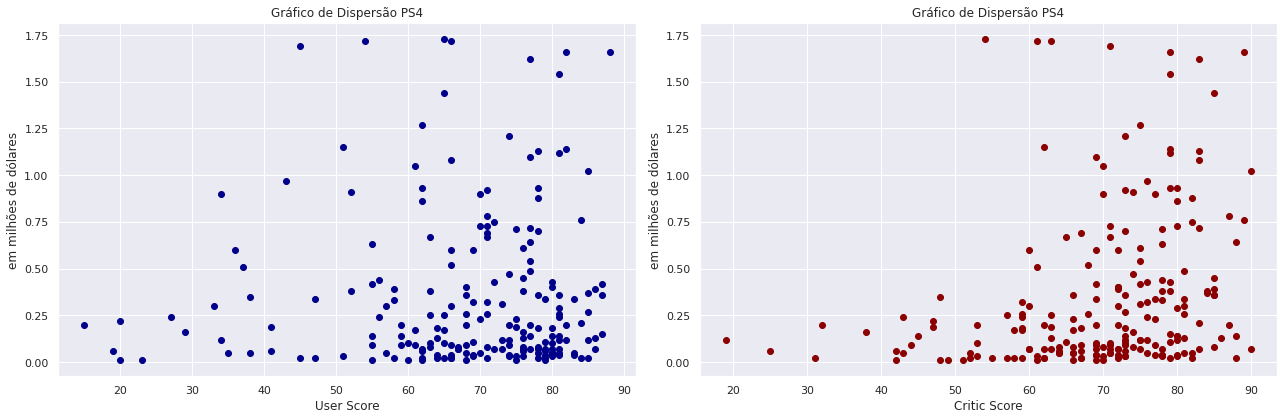

In [153]:
# plot do gráfico de dispersão de PS4
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_games_ps4['user_score'], df_games_ps4['total_sales'], marker='o', c='darkblue')
plt.title('Gráfico de Dispersão PS4')
plt.xlabel('User Score')
plt.ylabel('em milhões de dólares')

plt.subplot(1, 2, 2)
plt.scatter(df_games_ps4['critic_score'], df_games_ps4['total_sales'], marker='o', c='darkred')
plt.title('Gráfico de Dispersão PS4')
plt.xlabel('Critic Score')
plt.ylabel('em milhões de dólares')

plt.tight_layout()
plt.show()

*Gráfico de dispersão mostra que as críticas profissionais tendem a empurrar as vendas para cima e para a direita para a plataforma `PS4`. Reviews dos usuários parecem ter uma maior aleatoriedade.*

### *Dispersão para a plataforma XOne*

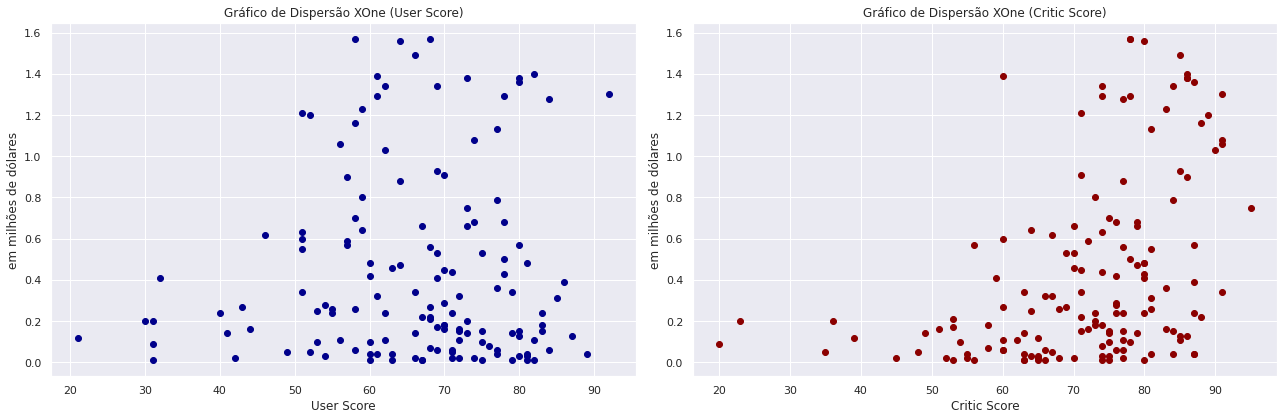

In [154]:
# plot do gráfico de dispersão
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_games_xone['user_score'], df_games_xone['total_sales'], marker='o', c='darkblue')
plt.title('Gráfico de Dispersão XOne (User Score)')
plt.xlabel('User Score')
plt.ylabel('em milhões de dólares')

plt.subplot(1, 2, 2)
plt.scatter(df_games_xone['critic_score'], df_games_xone['total_sales'], marker='o', c='darkred')
plt.title('Gráfico de Dispersão XOne (Critic Score)')
plt.xlabel('Critic Score')
plt.ylabel('em milhões de dólares')

plt.tight_layout()
plt.show()

*Mesma percepção aqui para a plataforma `XOne`.*

### *Cálculos de Correlação*

In [155]:
# separando as colunas para verificarmos a correlação
columns_for_corr = ['user_score', 'critic_score', 'total_sales']
df_games_ps4_corr = df_games_ps4[columns_for_corr]
df_games_xone_corr = df_games_xone[columns_for_corr]

In [156]:
# calculando correlação
corr_matrix_ps4 = df_games_ps4_corr.corr()

corr_matrix_ps4

user_score  critic_score  total_sales
user_score      1.000000      0.638477     0.030250
critic_score    0.638477      1.000000     0.264572
total_sales     0.030250      0.264572     1.000000

In [157]:
corr_matrix_xone = df_games_xone_corr.corr()

corr_matrix_xone

user_score  critic_score  total_sales
user_score      1.000000      0.543556     0.048474
critic_score    0.543556      1.000000     0.420134
total_sales     0.048474      0.420134     1.000000

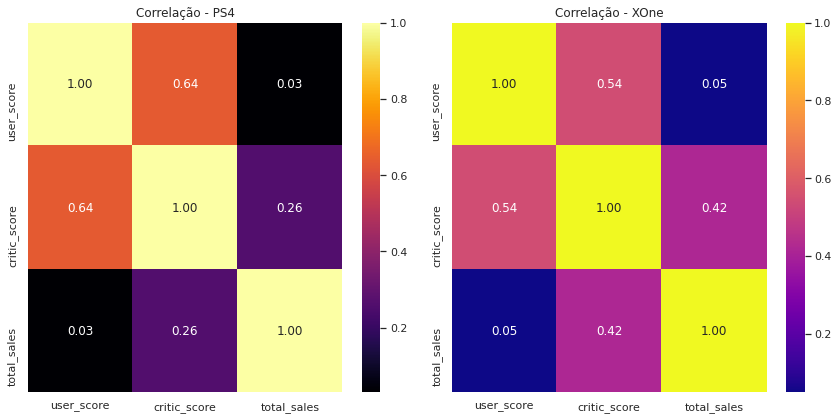

In [158]:
# plot heatmap
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix_ps4, annot=True, cmap='inferno', fmt=".2f")
plt.title('Correlação - PS4')

plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix_xone, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlação - XOne')

plt.tight_layout()
plt.show()

*Uma observação notável a partir do heatmap de correlação é que, para ambas as plataformas, existe uma correlação moderada entre as avaliações profissionais e as avaliações dos usuários.*

*Por outro lado, a correlação entre as avaliações dos usuários e as vendas totais é muito fraca, quase inexistente. No entanto, é evidente que as avaliações dos críticos profissionais desempenham um papel significativo, destacando-se como um fator importante sobre as vendas totais.*

# *Verificando o impacto das avaliações de usuários e profissionais nas vendas para mais 4 plataformas*

### *PS3, 3DS, X360 e Wii*

In [159]:
# filtrando...
df_games_ps3 = df_games_5y_filtered[(df_games_5y_filtered['platform'] == 'PS3') & 
                              (df_games_5y_filtered['user_score'] != 0) & 
                              (df_games_5y_filtered['critic_score'] != 0)]

df_games_3ds = df_games_5y_filtered[(df_games_5y_filtered['platform'] == '3DS') & 
                              (df_games_5y_filtered['user_score'] != 0) & 
                              (df_games_5y_filtered['critic_score'] != 0)]

df_games_x360 = df_games_5y_filtered[(df_games_5y_filtered['platform'] == 'X360') & 
                               (df_games_5y_filtered['user_score'] != 0) & 
                               (df_games_5y_filtered['critic_score'] != 0)]

df_games_wii = df_games_5y_filtered[(df_games_5y_filtered['platform'] == 'Wii') & 
                              (df_games_5y_filtered['user_score'] != 0) & 
                              (df_games_5y_filtered['critic_score'] != 0)]


In [160]:
# separando colunas
df_ps3_corr = df_games_ps3[columns_for_corr]
df_3ds_corr = df_games_3ds[columns_for_corr]
df_x360_corr = df_games_x360[columns_for_corr]
df_wii_corr = df_games_wii[columns_for_corr]

In [161]:
# calculando correlações
corr_matrix_ps3 = df_ps3_corr.corr()

corr_matrix_ps3

user_score  critic_score  total_sales
user_score      1.000000      0.594440     0.199872
critic_score    0.594440      1.000000     0.496421
total_sales     0.199872      0.496421     1.000000

In [162]:
corr_matrix_3ds = df_3ds_corr.corr()

corr_matrix_3ds

user_score  critic_score  total_sales
user_score      1.000000      0.700516     0.032686
critic_score    0.700516      1.000000     0.243723
total_sales     0.032686      0.243723     1.000000

In [163]:
corr_matrix_x360 = df_x360_corr.corr()

corr_matrix_x360

user_score  critic_score  total_sales
user_score      1.000000      0.600388     0.216595
critic_score    0.600388      1.000000     0.473963
total_sales     0.216595      0.473963     1.000000

In [164]:
corr_matrix_wii = df_wii_corr.corr()

corr_matrix_wii

user_score  critic_score  total_sales
user_score      1.000000      0.442052     0.045694
critic_score    0.442052      1.000000     0.317103
total_sales     0.045694      0.317103     1.000000

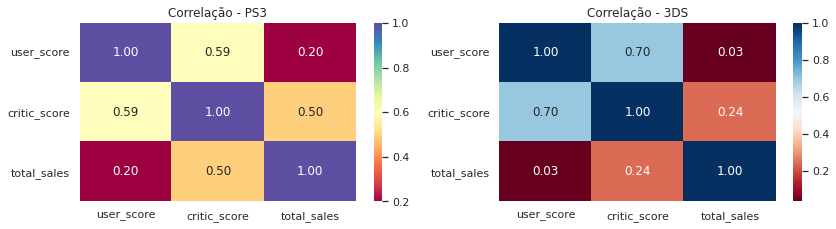

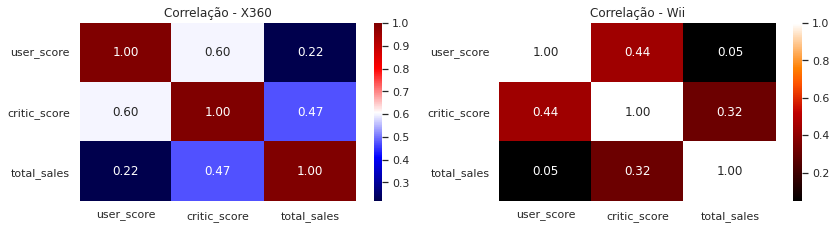

In [165]:
# plot heatmap - PS3 e 3DS
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.heatmap(corr_matrix_ps3, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlação - PS3')
plt.subplot(2, 2, 2)
sns.heatmap(corr_matrix_3ds, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlação - 3DS')

plt.tight_layout()
plt.show()

# plot heatmap - X360 e Wii
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.heatmap(corr_matrix_x360, annot=True, cmap='seismic', fmt=".2f")
plt.title('Correlação - X360')
plt.subplot(2, 2, 4)
sns.heatmap(corr_matrix_wii, annot=True, cmap='gist_heat', fmt=".2f")
plt.title('Correlação - Wii')

plt.tight_layout()
plt.show()

*Nossos novos gráficos confirmam que as avaliações dos críticos profissionais desempenham um papel crucial nas vendas totais, enquanto as avaliações dos usuários mantêm uma correlação fraca com as vendas.*

## *Analisando a distribuição dos jogos por gênero e avaliando os de alto desempenho e os de baixo desempenho em vendas.*

In [166]:
# agrupando por gênero e vendas totais
genre_sales = df_games_5y_filtered.groupby('genre')['total_sales'].sum()
genre_sales = genre_sales.sort_values(ascending=False).reset_index()

genre_sales

genre  total_sales
0         Action       272.15
1        Shooter        99.20
2         Sports        99.18
3   Role-Playing        84.67
4           Misc        64.82
5       Fighting        43.24
6         Racing        41.71
7      Adventure        35.95
8       Platform        28.28
9     Simulation        17.98
10      Strategy        13.07
11        Puzzle         6.51

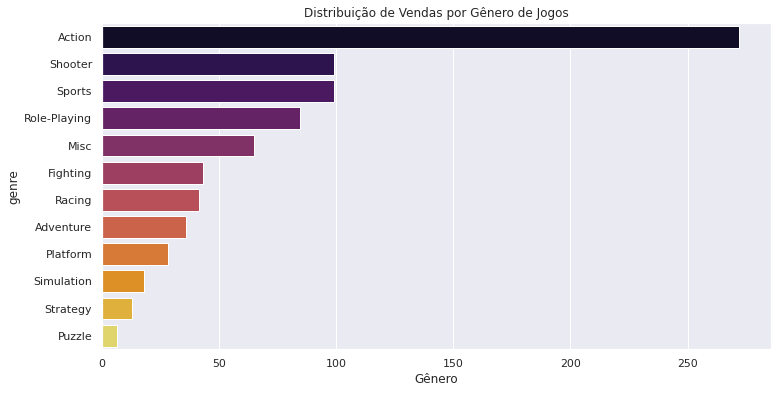

In [167]:
# plot do gráfico de barras
plt.figure(figsize=(12, 6)) 
ax = sns.barplot(x='total_sales', y='genre', orient='h', data=genre_sales, palette='inferno')
plt.xlabel('Gênero')
plt.title('Distribuição de Vendas por Gênero de Jogos')
plt.show()

In [168]:
# mais rentável
genre_sales.head(1)

genre  total_sales
0  Action       272.15

In [169]:
# menos rentáveis
genre_sales.tail(3)

genre  total_sales
9   Simulation        17.98
10    Strategy        13.07
11      Puzzle         6.51

*Se considerarmos uma análise geral, `Action` é notavelmente o gênero mais lucrativo, com vendas que ultrapassam em dobro o segundo colocado, `Shooter`. Em contrapartida, `Simulation`, `Puzzle` e `Strategy` estão entre os gêneros menos rentáveis.*

## *Criando um perfil de usuário para cada região*

### *América do Norte*

In [170]:
# north america region
na_region = df_games_5y_filtered.groupby('platform')['na_sales'].sum().reset_index()
na_region = na_region.sort_values(by='na_sales', ascending=False)
na_region = na_region.head().reset_index(drop=True)

na_region

platform  na_sales
0     X360    102.90
1      PS3     79.96
2     XOne     44.09
3      PS4     34.97
4      3DS     23.44

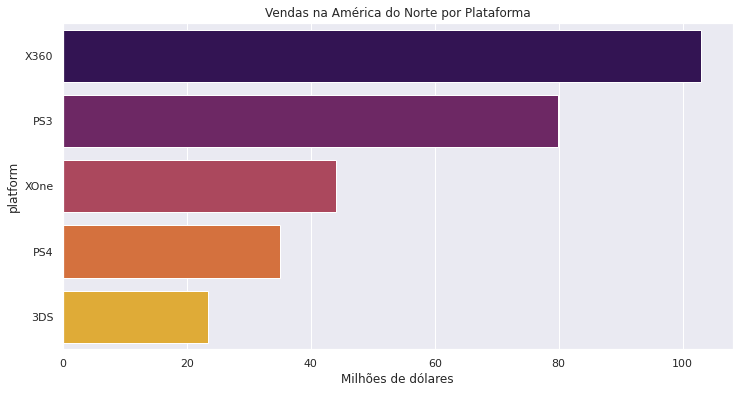

In [171]:
# plot do gráfico de barras (north america)
plt.figure(figsize=(12, 6))
sns.barplot(x='na_sales', y='platform', data=na_region, palette='inferno')
plt.title('Vendas na América do Norte por Plataforma')
plt.xlabel('Milhões de dólares')
plt.show()

*Verifica-se preferência por plataformas de `Microsoft` e da `Sony` na América do Norte.*

### *Europa*

In [172]:
# europe region
eu_region = df_games_5y_filtered.groupby('platform')['eu_sales'].sum().reset_index()
eu_region = eu_region.sort_values(by='eu_sales', ascending=False)
eu_region = eu_region.head().reset_index(drop=True)

eu_region

platform  eu_sales
0      PS3     65.68
1     X360     54.01
2      PS4     43.29
3       PC     24.57
4     XOne     24.55

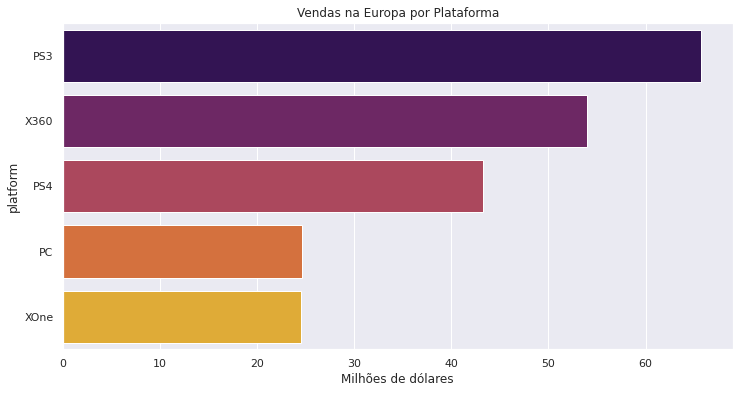

In [173]:
# plot do gráfico de barras (europe)
plt.figure(figsize=(12, 6))
sns.barplot(x='eu_sales', y='platform', data=eu_region, palette='inferno')
plt.title('Vendas na Europa por Plataforma')
plt.xlabel('Milhões de dólares')
plt.show()

*Na Europa nota-se uma alternância entre as plataformas, mas aparece a plataforma `PC` duelando com `XOne`.*

### *Japão*

In [174]:
# japan region
jp_region = df_games_5y_filtered.groupby('platform')['jp_sales'].sum().reset_index()
jp_region = jp_region.sort_values(by='jp_sales', ascending=False)
jp_region = jp_region.head().reset_index(drop=True)

jp_region

platform  jp_sales
0      PS3     37.50
1      3DS     31.30
2      PSP     17.16
3      PSV     16.07
4      PS4     10.08

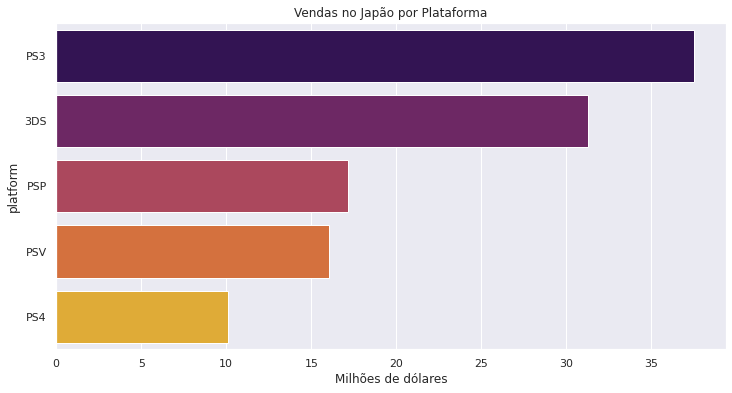

In [175]:
# plot do gráfico de barras (japan)
plt.figure(figsize=(12, 6))
sns.barplot(x='jp_sales', y='platform', data=jp_region, palette='inferno')
plt.title('Vendas no Japão por Plataforma')
plt.xlabel('Milhões de dólares')
plt.show()

*No Japão percebe-se uma notável procura por plataformas portáteis, com 3 representantes no top 5.*

### *Outras regiões*

In [176]:
# other_regions
other_region = df_games_5y_filtered.groupby('platform')['other_sales'].sum().reset_index()
other_region= other_region.sort_values(by='other_sales', ascending=False)
other_region = other_region.head().reset_index(drop=True)

other_region

platform  other_sales
0      PS3        27.45
1      PS4        15.16
2     X360        15.03
3     XOne         6.73
4       PC         4.00

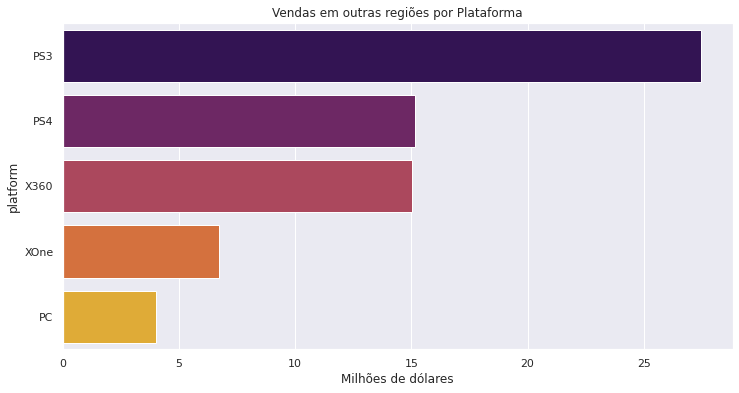

In [177]:
# plot do gráfico de barras (other regions)
plt.figure(figsize=(12, 6))
sns.barplot(x='other_sales', y='platform', data=other_region, palette='inferno')
plt.title('Vendas em outras regiões por Plataforma')
plt.xlabel('Milhões de dólares')
plt.show()

*Em outros mercados `PS3` e `PS4` são líderes em vendas.*

## *Verificando os gêneros preferidos em cada região com base no perfil do usuário criado anteriormente*

In [178]:
# agrupando por genre
na_region = df_games_5y_filtered.groupby('genre')['na_sales'].sum().reset_index()
na_region = na_region.sort_values(by='na_sales', ascending=False)
na_region = na_region.head().reset_index(drop=True)

na_region

genre  na_sales
0        Action    113.59
1        Sports     50.69
2       Shooter     47.22
3          Misc     32.87
4  Role-Playing     28.89

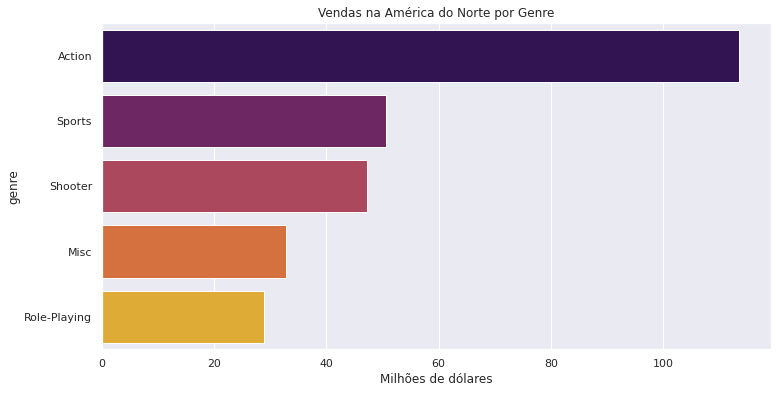

In [179]:
# plot do gráfico de barras (north america)
plt.figure(figsize=(12, 6))
sns.barplot(x='na_sales', y='genre', data=na_region, palette='inferno')
plt.title('Vendas na América do Norte por Genre')
plt.xlabel('Milhões de dólares')
plt.show()

*Observa-se uma predileção por gêneros mais `dinâmicos` na América do Norte.*

### *Europa*

In [180]:
# agrupando by genre
eu_region = df_games_5y_filtered.groupby('genre')['eu_sales'].sum().reset_index()
eu_region = eu_region.sort_values(by='eu_sales', ascending=False)
eu_region = eu_region.head().reset_index(drop=True)

eu_region

genre  eu_sales
0        Action     87.82
1       Shooter     37.45
2        Sports     29.32
3        Racing     21.34
4  Role-Playing     18.41

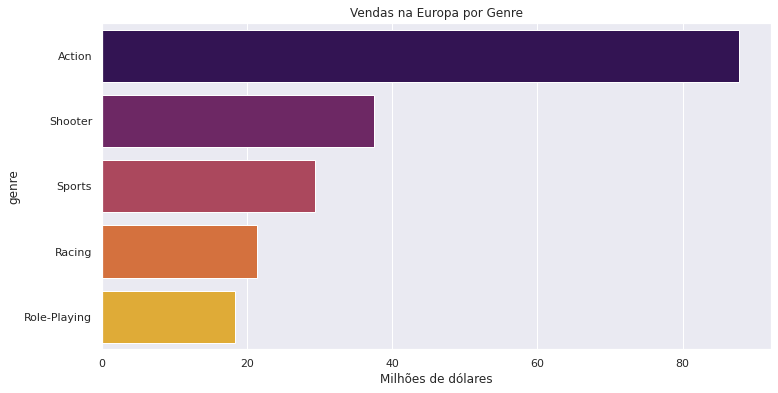

In [181]:
# plot do gráfico de barras (europe)
plt.figure(figsize=(12, 6))
sns.barplot(x='eu_sales', y='genre', data=eu_region, palette='inferno')
plt.title('Vendas na Europa por Genre')
plt.xlabel('Milhões de dólares')
plt.show()

*Gênero de `Action` volta a liderar, mas na Europa nota-se também uma inclinação pelo gênero de `Racing`.*

### *Japão*

In [182]:
# agrupando por genre
jp_region = df_games_5y_filtered.groupby('genre')['jp_sales'].sum().reset_index()
jp_region = jp_region.sort_values(by='jp_sales', ascending=False)
jp_region = jp_region.head().reset_index(drop=True)

jp_region

genre  jp_sales
0        Action     43.81
1  Role-Playing     30.59
2          Misc     11.58
3     Adventure     11.31
4        Sports      8.34

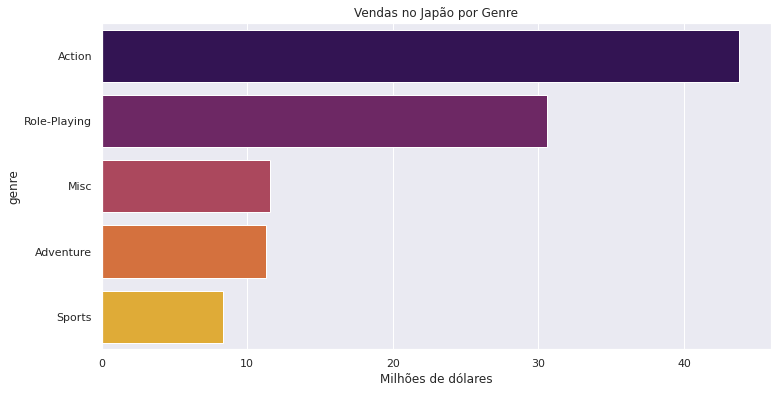

In [183]:
# plot do gráfico de barras (japan)
plt.figure(figsize=(12, 6))
sns.barplot(x='jp_sales', y='genre', data=jp_region, palette='inferno')
plt.title('Vendas no Japão por Genre')
plt.xlabel('Milhões de dólares')
plt.show()

*Mais uma vez, no Japão, o gênero de ação lidera as vendas, enquanto os estilos de `Role-Playing` e `Adventure` também marcam presença.*

# *Influência das Classificações ESRB nas Vendas por Região*

### *América do Norte*

In [184]:
# agrupando por ESRB
na_region = df_games_5y_filtered.groupby('rating')['na_sales'].sum().reset_index()
na_region = na_region.sort_values(by='na_sales', ascending=False)
na_region = na_region.head().reset_index(drop=True)

na_region

rating  na_sales
0                 Mature     96.55
1               Everyone     66.43
2  Everyone 10 and Older     66.13
3                   Teen     63.33
4         Rating Pending     51.48

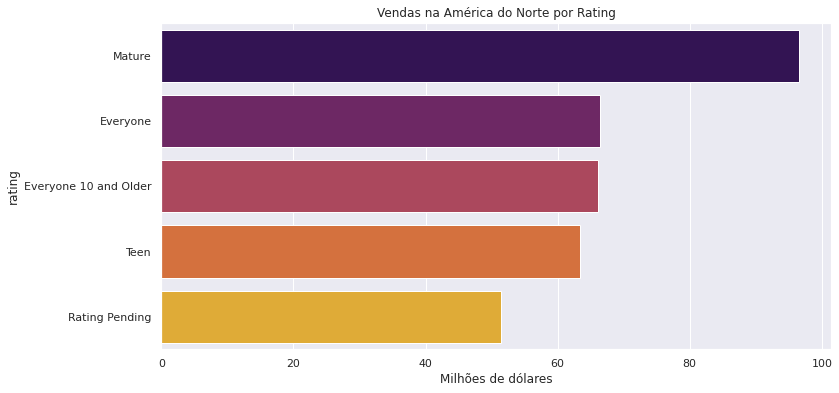

In [185]:
# plot do gráfico de barras (north america)
plt.figure(figsize=(12, 6))
sns.barplot(x='na_sales', y='rating', data=na_region, palette='inferno')
plt.title('Vendas na América do Norte por Rating')
plt.xlabel('Milhões de dólares')
plt.show()

*A classificação `Mature` lidera as vendas de jogos, indicando um maior consumo por parte dos adultos. Em segundo lugar, na América do Norte, encontra-se a classificação `Everyone`.*

### *Europa*

In [186]:
# agrupando por genre
eu_region = df_games_5y_filtered.groupby('rating')['eu_sales'].sum().reset_index()
eu_region = eu_region.sort_values(by='eu_sales', ascending=False)
eu_region = eu_region.head().reset_index(drop=True)

eu_region

rating  eu_sales
0                 Mature     72.50
1         Rating Pending     47.64
2  Everyone 10 and Older     46.95
3                   Teen     46.53
4               Everyone     41.56

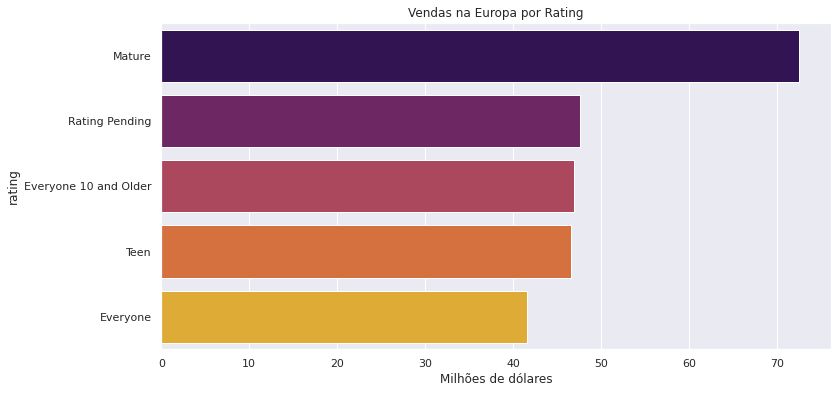

In [187]:
# plot do gráfico de barras (europe)
plt.figure(figsize=(12, 6))
sns.barplot(x='eu_sales', y='rating', data=eu_region, palette='inferno')
plt.title('Vendas na Europa por Rating')
plt.xlabel('Milhões de dólares')
plt.show()

*A classificação `Mature` continua liderando as vendas de jogos, sinalizando um público majoritariamente adulto, enquanto na Europa, jogos sem classificação (`Rating Pending`) ocupam agora o segundo lugar, evidenciando uma tendência crescente e a presença de títulos não classificados.*

### *Japão*

In [188]:
# agrupando por genre
jp_region = df_games_5y_filtered.groupby('rating')['jp_sales'].sum().reset_index()
jp_region = jp_region.sort_values(by='jp_sales', ascending=False)
jp_region = jp_region.head().reset_index(drop=True)
jp_region

rating  jp_sales
0         Rating Pending     80.99
1                   Teen     23.14
2                 Mature     12.21
3               Everyone      6.27
4  Everyone 10 and Older      4.73

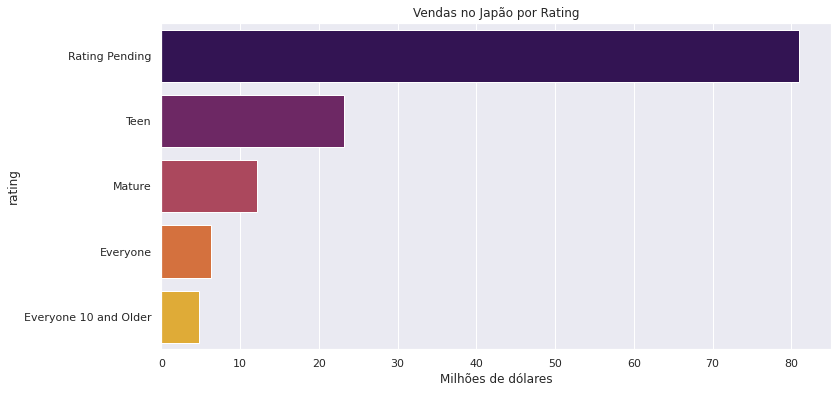

In [189]:
# plot do gráfico de barras (japan)
plt.figure(figsize=(12, 6))
sns.barplot(x='jp_sales', y='rating', data=jp_region, palette='inferno')
plt.title('Vendas no Japão por Rating')
plt.xlabel('Milhões de dólares')
plt.show()

*O Japão destaca-se como um mercado singular, onde jogos direcionados para um público jovem ocupam a segunda posição, e o primeiro lugar é conquistado por jogos sem classificação (`Rating Pending`). Isso sugere a possibilidade de que a classificação de jogos pode não ser uma prática comum na região.*

# *Testando hipóteses*

### *Teste de hipótese para verificar se as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.*

*Definindo:*
- *Hipótese Nula (H0): As classificações médias dos usuários para as plataformas `Xbox One` e `PC` são iguais.*
- *Hipótese Alternativa (H1): As classificações médias dos usuários para as plataformas `Xbox One` e `PC` não são iguais.*

In [190]:
# analisando nossos dados
df_games_5y_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3584 entries, 1022 to 16714
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3584 non-null   object 
 1   platform                   3584 non-null   object 
 2   year_of_release            3584 non-null   float64
 3   genre                      3584 non-null   object 
 4   na_sales                   3584 non-null   float64
 5   eu_sales                   3584 non-null   float64
 6   jp_sales                   3584 non-null   float64
 7   other_sales                3584 non-null   float64
 8   critic_score               3584 non-null   float64
 9   user_score                 1700 non-null   float64
 10  rating                     3584 non-null   object 
 11  total_sales                3584 non-null   float64
 12  received_score_from_users  3584 non-null   int64  
dtypes: float64(8), int64(1), object(4)
memory us

In [191]:
# verificando os dados ausentes
df_games_5y_filtered.user_score.isna().sum()

1884

*Dado o contexto observado nos gráficos anteriores, onde identificamos que em algumas regiões não há sistemas de avaliação por parte de usuários e críticos profissionais, e também falta um sistema de classificação etária para certas regiões, decidimos adotar a abordagem de remoção dos valores nulos na coluna `user_score`. Nossa análise estatística e teste de hipótese serão realizados com base nos valores de `user_score` disponíveis, já que a ausência de dados nessas regiões sugere que não existem avaliações ou classificações a serem consideradas.*

In [192]:
# filtrando
# top_six_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
ratings_xbox_one = df_games_5y_filtered.query('platform == "XOne"')['user_score']
ratings_pc = df_games_5y_filtered.query('platform == "PC"')['user_score']

In [193]:
# algumas métricas
print(f'XOne:\nmédia = {ratings_xbox_one.mean()} \nmediana = {ratings_xbox_one.median()}\ndesvio padrão = {ratings_xbox_one.std()}')
print()
print(f'PC:\nmédia = {ratings_pc.mean()} \nmediana = {ratings_pc.median()}\ndesvio padrão = {ratings_pc.std()}')

XOne:
média = 65.73417721518987 
mediana = 68.0
desvio padrão = 13.87772706729679

PC:
média = 64.38403041825094 
mediana = 68.0
desvio padrão = 15.88919323176363


In [194]:
# removendo os valores ausentes
ratings_xbox_one = ratings_xbox_one.dropna()
ratings_pc = ratings_pc.dropna()

In [195]:
# verificando o tamanho da variável ratings_pc
len(ratings_pc)

263

In [196]:
# verificando o tamanho da variável ratings_xbox_one
len(ratings_xbox_one)

158

In [197]:
# Verificando a variância das amostras, usando o teste de levene
statistic, p_value = st.levene(ratings_xbox_one, ratings_pc)
alpha = 0.05

print("Estatística do teste de Levene:", statistic)
print("p-valor do teste de Levene:", p_value)

if p_value < alpha:
    print("As variâncias são significativamente diferentes.")
else:
    print("Não há evidência significativa de diferença nas variâncias.")

Estatística do teste de Levene: 4.1076491481845645
p-valor do teste de Levene: 0.04332247443354652
As variâncias são significativamente diferentes.


In [198]:
# definindo alpha e aplicando t-student
alpha = 0.05
t_statistic, p_value = st.ttest_ind(ratings_xbox_one, ratings_pc, equal_var=False)

print(f'P-Value: {p_value}')

if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0): As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.")
else:
    print("Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que as classificações médias dos usuários das plataformas Xbox One e PC são diferentes.")

P-Value: 0.360967735162648
Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que as classificações médias dos usuários das plataformas Xbox One e PC são diferentes.


*Após realizar o teste de t-student, constatamos que não existem evidências suficientes para concluir que as médias de classificações para os usuários das plataformas `XOne` e `PC` sejam diferentes.*

### *Teste de hipótese para verificar se as classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.*

*Definindo:*
- *Hipótese Nula (H0): As classificações médias dos usuários para os gêneros `Action` e `Sports` são iguais.*
- *Hipótese Alternativa (H1): As classificações médias dos usuários para os gêneros `Action` e `Sports` não são iguais.*

In [199]:
# verificando
df_games_5y_filtered.genre.unique()

array(['Action', 'Shooter', 'Platform', 'Racing', 'Adventure',
       'Role-Playing', 'Sports', 'Fighting', 'Puzzle', 'Misc', 'Strategy',
       'Simulation'], dtype=object)

In [200]:
# filtrando
ratings_action = df_games_5y_filtered.query('genre == "Action"')['user_score']
ratings_sports = df_games_5y_filtered.query('genre == "Sports"')['user_score']

In [201]:
# algumas métricas
print(f'XOne:\nmédia = {ratings_action.mean()} \nmediana = {ratings_action.median()}\ndesvio padrão = {ratings_action.std()}')
print()
print(f'PC:\nmédia = {ratings_sports.mean()} \nmediana = {ratings_sports.median()}\ndesvio padrão = {ratings_sports.std()}')

XOne:
média = 67.08406304728547 
mediana = 70.0
desvio padrão = 13.491515525765923

PC:
média = 56.32663316582914 
mediana = 60.0
desvio padrão = 17.732263701538916


In [202]:
# removendo os valores ausentes
ratings_action = ratings_action.dropna()
ratings_sports = ratings_sports.dropna()

In [203]:
# verificando o tamanho da variável ratings_action
len(ratings_action)

571

In [204]:
# verificando o tamanho da variável ratings_sports
len(ratings_sports)

199

In [205]:
# Verificando a variância das amostras, usando o teste de levene
statistic, p_value = st.levene(ratings_action, ratings_sports)
alpha = 0.05

print("Estatística do teste de Levene:", statistic)
print("p-valor do teste de Levene:", p_value)

if p_value < alpha:
    print("As variâncias são significativamente diferentes.")
else:
    print("Não há evidência significativa de diferença nas variâncias.")

Estatística do teste de Levene: 21.749680362663373
p-valor do teste de Levene: 3.6631974096312523e-06
As variâncias são significativamente diferentes.


In [206]:
# definindo alpha e aplicando t-student
alpha = 0.05
t_statistic, p_value = st.ttest_ind(ratings_action, ratings_sports, equal_var=False)

print(f'P-Value: {p_value}')

if p_value < alpha:
    print("Rejeitamos a hipótese nula (H0): As classificações médias dos usuários nos gêneros Action e Sports são diferentes.")
else:
    print("Não rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que as classificações médias dos usuários nos gêneros Action e Sports são diferentes.")

P-Value: 1.1577896819805346e-13
Rejeitamos a hipótese nula (H0): As classificações médias dos usuários nos gêneros Action e Sports são diferentes.


*Com base nos resultados do teste, podemos concluir que as médias das avaliações de usuários para os gêneros de `Action` e `Sports` são estatisticamente diferentes.*

# *Conclusão Geral da Análise de Dados*

*Chegamos ao final do processo de análise de dados e obtivemos insights valiosos. Processamos um grande DataFrame cheio de valores faltantes e adotamos uma abordagem focada na visualização, buscando ir além dos números para representar graficamente o jogo, a plataforma e o comportamento do jogador, uso e vendas, bem como o ciclo de vida do jogo.*

***Destacamos alguns pontos-chave:***
- Exploramos a frequência de palavras em nomes de jogos, revelando que muitos jogos recebem uma segunda edição (II).
- `Need for Speed Most Wanted`, um jogo do gênero de corrida, liderou em termos de lançamentos em várias plataformas.
- As plataformas `PS2` e `DS` (portátil) receberam a maioria dos jogos em nosso DataFrame.
- Nossa análise abrangeu dados de 1980 a 2016, com um pico de lançamentos de jogos em 2010.
- Jogos dos gêneros `Action` e `Sports` receberam mais lançamentos.
- Observamos grandes diferenças entre os mercados da América do Norte, Japão e Europa em termos de preferências de gênero e plataformas.
- O mercado japonês tem uma forte preferência por plataformas portáteis.
- Gêneros de `Puzzle` e `Strategy` são os menos lucrativos.
- Notamos o impacto das avaliações profissionais nas vendas, destacando a importância de acompanhar análises de revistas e sites especializados.
- Nem todas as regiões classificam jogos por faixa etária ou têm o hábito de avaliá-los.
- As avaliações mais altas, dadas por profissionais, são para jogos dos gêneros `Shooter` e `Racing`, indicando um mercado a ser explorado.
- A partir de 1995, houve um aumento significativo no lançamento de jogos, seguido por uma desaceleração a partir de 2010.
- As vendas totais variam de plataforma para plataforma, sugerindo a necessidade de uma estratégia personalizada para cada mercado.
- As principais plataformas de vendas, como `PS3` e `X360`, estão se aproximando do fim de suas vidas úteis, indicando que é melhor investir em suas novas edições, ou seja, `PS4` e `XOne`.
- Os usuários na América do Norte preferem plataformas da `Microsoft` e `Sony`, enquanto os europeus jogam com bastante regularidade em computadores (`PC`), além das plataformas mencionadas.
- O gênero de `Action` é o preferido nos três mercados mencionados.

***Realizamos dois testes de hipótese, destacando que estatisticamente as classificações médias dos usuários para as plataformas `Xbox One` e `PC` são iguais, enquanto as médias das avaliações de usuários para os gêneros `Action` e `Sports` são estatisticamente diferentes.***

**Essas descobertas fornecem insights valiosos para orientar decisões e estratégias no mercado de jogos!**